In [263]:
# import libraries and packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [264]:
# Import and read df

df = pd.read_csv("cubic_zirconia.csv")
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [265]:
# check the size of df

df.shape

(26967, 11)

In [266]:
# check info on dtypes, null values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  26967 non-null  int64  
 1   carat       26967 non-null  float64
 2   cut         26967 non-null  object 
 3   color       26967 non-null  object 
 4   clarity     26967 non-null  object 
 5   depth       26270 non-null  float64
 6   table       26967 non-null  float64
 7   x           26967 non-null  float64
 8   y           26967 non-null  float64
 9   z           26967 non-null  float64
 10  price       26967 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 2.3+ MB


In [267]:
# check for duplicate entries

df.duplicated().sum()

0

In [268]:
# We may notice that column Unnamed: 0 is just the serial number and does not have any role in model building. 
# We can set it as index for better reference

df = df.set_index('Unnamed: 0')
print(f'The df now has {df.shape[1]} columns')

The df now has 10 columns


In [269]:
# check for duplicates in new df
df.duplicated().sum() #since there is no identifier column, we can not assume any duplication and treat all records independent

34

In [270]:
# check unique values in object type columns

for col in (df.select_dtypes(['object']).columns):
    print('Column {} has {} unique values:\n{}'.format(col,len(df[col].unique()),df[col].value_counts(dropna=False)))
    print('===========================================================\n')

Column cut has 5 unique values:
Ideal        10816
Premium       6899
Very Good     6030
Good          2441
Fair           781
Name: cut, dtype: int64

Column color has 7 unique values:
G    5661
E    4917
F    4729
H    4102
D    3344
I    2771
J    1443
Name: color, dtype: int64

Column clarity has 8 unique values:
SI1     6571
VS2     6099
SI2     4575
VS1     4093
VVS2    2531
VVS1    1839
IF       894
I1       365
Name: clarity, dtype: int64



In [271]:
# check summary statistics for variables

df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
carat,26967,NaN,NaN,NaN,0.798375,0.477745,0.2,0.4,0.7,1.05,4.5
cut,26967,5,Ideal,10816,NaN,NaN,NaN,NaN,NaN,NaN,NaN
color,26967,7,G,5661,NaN,NaN,NaN,NaN,NaN,NaN,NaN
clarity,26967,8,SI1,6571,NaN,NaN,NaN,NaN,NaN,NaN,NaN
depth,26270,NaN,NaN,NaN,61.7451,1.41286,50.8,61,61.8,62.5,73.6
table,26967,NaN,NaN,NaN,57.4561,2.23207,49,56,57,59,79
x,26967,NaN,NaN,NaN,5.72985,1.12852,0,4.71,5.69,6.55,10.23
y,26967,NaN,NaN,NaN,5.73357,1.16606,0,4.71,5.71,6.54,58.9
z,26967,NaN,NaN,NaN,3.53806,0.720624,0,2.9,3.52,4.04,31.8
price,26967,NaN,NaN,NaN,3939.52,4024.86,326,945,2375,5360,18818


In [272]:
# as we had noticed x, y, z are the dimensions, they can not be zero for cz 

df[(df['x']==0)|((df['y']==0) | (df['z']==0))]    # below 9 records seem to be wrong entries, we can drop them

,carat,cut,color,clarity,depth,table,x,y,z,price
Unnamed: 0,,,,,,,,,,
5822,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.0,2130
6035,2.02,Premium,H,VS2,62.7,53.0,8.02,7.95,0.0,18207
6216,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.0,2130
10828,2.20,Premium,H,SI1,61.2,59.0,8.42,8.37,0.0,17265
12499,2.18,Premium,H,SI2,59.4,61.0,8.49,8.45,0.0,12631
12690,1.10,Premium,G,SI2,63.0,59.0,6.50,6.47,0.0,3696
17507,1.14,Fair,G,VS1,57.5,67.0,0.00,0.00,0.0,6381
18195,1.01,Premium,H,I1,58.1,59.0,6.66,6.60,0.0,3167
23759,1.12,Premium,G,I1,60.4,59.0,6.71,6.67,0.0,2383


In [273]:
# dropping where dimensions of diamond are zero

df.drop(df[(df['x']==0) | ((df['y']==0) | (df['z']==0))].index, inplace=True)
print(f'The df now has {df.shape[0]} records')

The df now has 26958 records


In [274]:
# check for unrealistics values for 'y'.max() and 'z'

df[(df['x'] == df['x'].max())|(df['y'] == df['y'].max())|(df['z'] == df['z'].max())]

,carat,cut,color,clarity,depth,table,x,y,z,price
Unnamed: 0,,,,,,,,,,
345,0.51,Very Good,E,VS1,NaN,54.7,5.12,5.15,31.80,1970
12501,4.50,Fair,J,I1,65.8,58.0,10.23,10.16,6.72,18531
25796,2.00,Premium,H,SI2,58.9,57.0,8.09,58.90,8.06,12210


In [275]:
# we will drop only max y and max z values as max x is well within range

df.drop(df[(df['y'] == df['y'].max())|(df['z'] == df['z'].max())].index, inplace=True)
print(f'The df now has {df.shape[0]} records')

The df now has 26956 records


In [276]:
# lets check again the maximum values of x, y and z
#|(df['price']==df['price'].max())

df[(df['x'] == df['x'].max())|(df['y'] == df['y'].max())|(df['z'] == df['z'].max())]

,carat,cut,color,clarity,depth,table,x,y,z,price
Unnamed: 0,,,,,,,,,,
12501,4.5,Fair,J,I1,65.8,58.0,10.23,10.16,6.72,18531


In [277]:
# check for null values per columns, column depth has 697 null values

df.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      696
table        0
x            0
y            0
z            0
price        0
dtype: int64

In [278]:
# treating null values: by knn+

from sklearn.impute import KNNImputer    # import library

import math
math.sqrt(df.shape[0])                # optimal k value for knn is sqrt of N, where N is number of records

164.18282492392436

In [279]:
# prepare df to fit into knn model
imputer = KNNImputer(n_neighbors=165)               # define imputing parameters  for model

df_knn = df.copy()                                  # create copy of df
df_knn = pd.get_dummies(df_knn, drop_first=True)    # convert cat var into numeric
df_knn.head(2)                                      # check the head of new df

,carat,depth,table,x,y,z,price,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
1,0.30,62.1,58.0,4.27,4.29,2.66,499,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,0.33,60.8,58.0,4.42,4.46,2.70,984,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [280]:
# fit model and impute knn value

imputed_knn = imputer.fit_transform(df_knn)
imputed_knn

array([[ 0.3 , 62.1 , 58.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.33, 60.8 , 58.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.9 , 62.2 , 60.  , ...,  0.  ,  0.  ,  1.  ],
       ...,
       [ 0.51, 61.7 , 58.  , ...,  1.  ,  0.  ,  0.  ],
       [ 0.27, 61.8 , 56.  , ...,  0.  ,  0.  ,  1.  ],
       [ 1.25, 62.  , 58.  , ...,  0.  ,  0.  ,  0.  ]])

In [281]:
# new df with imputed value

df_knn = pd.DataFrame(imputed_knn, columns = df_knn.columns)
df_knn.head()

,carat,depth,table,x,y,z,price,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.30,62.1,58.0,4.27,4.29,2.66,499.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.33,60.8,58.0,4.42,4.46,2.70,984.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.90,62.2,60.0,6.04,6.12,3.78,6289.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.42,61.6,56.0,4.82,4.80,2.96,1082.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.31,60.4,59.0,4.35,4.43,2.65,779.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [282]:
# lets compare the means of original and treated df

df.mean()

carat       0.798156
depth      61.745453
table      57.455461
x           5.730040
y           5.731881
z           3.538022
price    3938.077422
dtype: float64

In [283]:
df_knn.mean()

carat               0.798156
depth              61.745689
table              57.455461
x                   5.730040
y                   5.731881
z                   3.538022
price            3938.077422
cut_Good            0.090481
cut_Ideal           0.401246
cut_Premium         0.255676
cut_Very Good       0.223661
color_E             0.182371
color_F             0.175360
color_G             0.209898
color_H             0.151988
color_I             0.102797
color_J             0.053532
clarity_IF          0.033165
clarity_SI1         0.243731
clarity_SI2         0.169536
clarity_VS1         0.151766
clarity_VS2         0.226221
clarity_VVS1        0.068222
clarity_VVS2        0.093894
dtype: float64

C:\Users\Swati\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


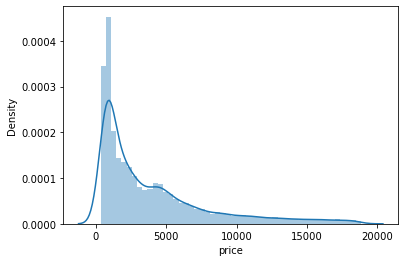

carat    1.116534
depth   -0.027495
table    0.764905
x        0.402458
y        0.397781
z        0.400839
price    1.618631
dtype: float64

In [284]:
sns.distplot(df['price'])
plt.show()
df.skew()

C:\Users\Swati\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


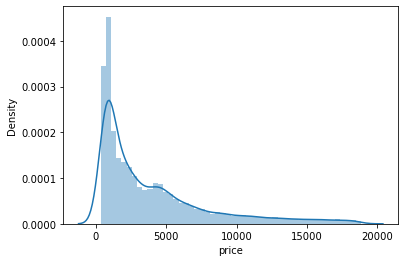

carat            1.116534
depth           -0.028340
table            0.764905
x                0.402458
y                0.397781
z                0.400839
price            1.618631
cut_Good         2.855251
cut_Ideal        0.402974
cut_Premium      1.120197
cut_Very Good    1.326405
color_E          1.645196
color_F          1.707494
color_G          1.424820
color_H          1.938839
color_I          2.615957
color_J          3.967220
clarity_IF       5.214351
clarity_SI1      1.193872
clarity_SI2      1.761522
clarity_VS1      1.941246
clarity_VS2      1.308822
clarity_VVS1     3.425272
clarity_VVS2     2.784748
dtype: float64

In [285]:
sns.distplot(df_knn['price'])
plt.show()
df_knn.skew()

In [286]:
# NH: data is normally distributed, here 

from scipy import stats

shapiro_test = stats.shapiro(df['price'])

print(shapiro_test, '\np value <0.01 means null hypothesis is rejected and DV is not normal')

ShapiroResult(statistic=0.7957057356834412, pvalue=0.0) 
p value <0.01 means null hypothesis is rejected and DV is not normal


C:\Users\Swati\anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


C:\Users\Swati\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


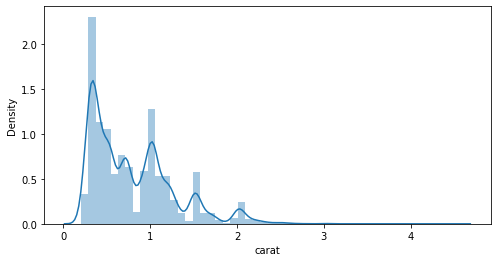

C:\Users\Swati\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


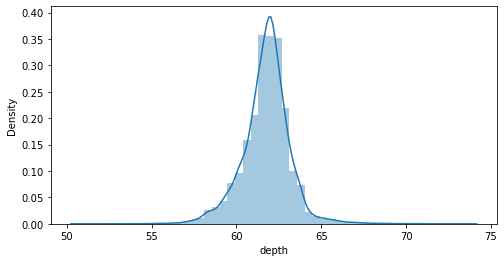

C:\Users\Swati\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


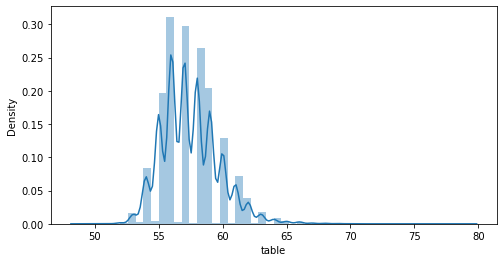

C:\Users\Swati\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


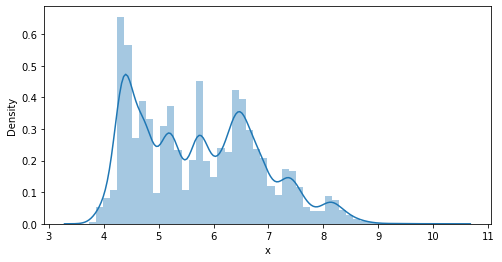

C:\Users\Swati\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


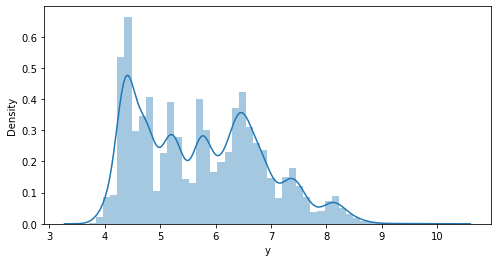

C:\Users\Swati\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


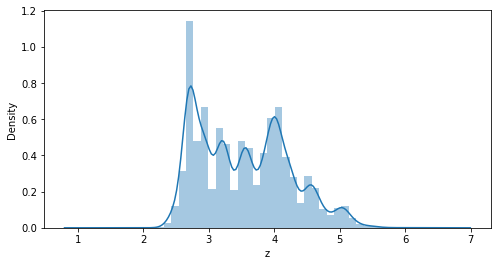

C:\Users\Swati\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


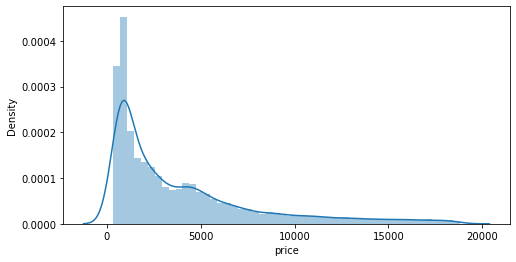

In [287]:
# lets check distribution
# boxplot.stats(x)
for i in df.select_dtypes(['float64', 'int64']).columns:
    plt.figure(figsize=(8,4))
    sns.distplot(df[i])
    plt.show()
    print('=================================================================================================')

In [288]:
df.mode().sum()

carat        0.3
cut        Ideal
color          G
clarity      SI1
depth         62
table         56
x           4.38
y           4.35
z           2.69
price        544
dtype: object

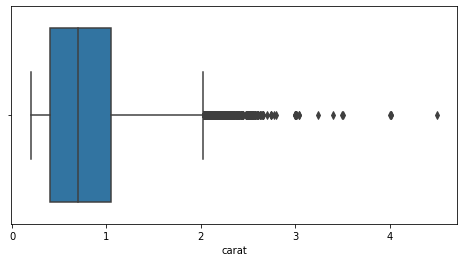

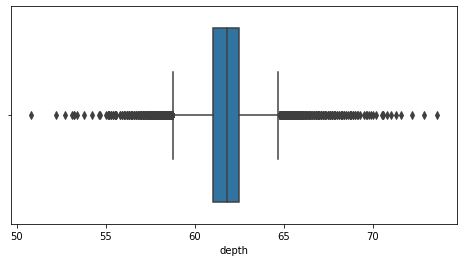

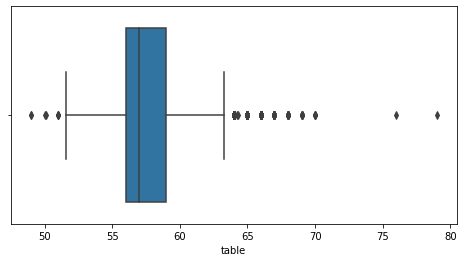

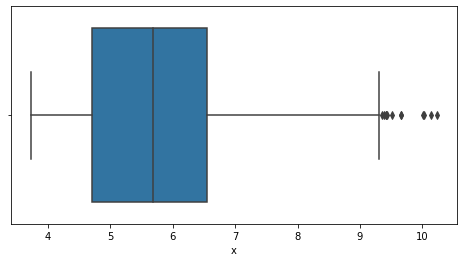

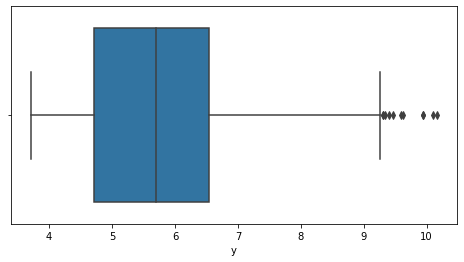

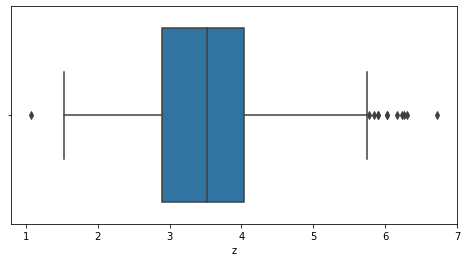

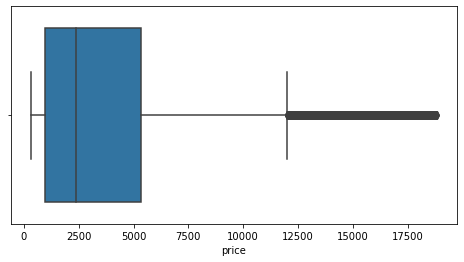

In [289]:
# lets check for outlier
# boxplot.stats(x)
for i in df.select_dtypes(['float64', 'int64']).columns:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=i, data=df)
    plt.show()
    print('=================================================================================================')

In [290]:
print("Calculating Number of Outliers in each column with the help of formula : (Q1-1.5*IQR) and (Q3+1.5*IQR) ")
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
A=((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()
B=A[A!=0].sort_values(ascending=False)
print(B)

Calculating Number of Outliers in each column with the help of formula : (Q1-1.5*IQR) and (Q3+1.5*IQR) 
price    1777
depth    1223
carat     660
table     317
z          12
x          12
y          11
dtype: int64


In [291]:
df_knn.columns

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'price', 'cut_Good',
       'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_E', 'color_F',
       'color_G', 'color_H', 'color_I', 'color_J', 'clarity_IF', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1',
       'clarity_VVS2'],
      dtype='object')

In [292]:
from scipy.stats import zscore

df_scaled = stats.zscore(df_knn)
df_scaled = pd.DataFrame(df_scaled, columns=['carat', 'depth', 'table', 'x', 'y', 'z', 'price', 'cut_Good',
       'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_E', 'color_F',
       'color_G', 'color_H', 'color_I', 'color_J', 'clarity_IF', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1',
       'clarity_VVS2'])
df_scaled

,carat,depth,table,x,y,z,price,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,-1.043145,0.254143,0.244056,-1.295927,-1.289212,-1.260868,-0.854832,-0.315408,1.221570,-0.586089,...,-0.423355,-0.33849,-0.237822,-0.185210,1.761503,-0.451825,-0.422989,-0.540701,-0.270587,-0.321906
1,-0.980325,-0.678330,0.244056,-1.162787,-1.137212,-1.203427,-0.734279,-0.315408,-0.818619,1.706224,...,-0.423355,-0.33849,-0.237822,5.399271,-0.567697,-0.451825,-0.422989,-0.540701,-0.270587,-0.321906
2,0.213263,0.325871,1.140433,0.275120,0.347024,0.347488,0.584356,-0.315408,-0.818619,-0.586089,...,-0.423355,-0.33849,-0.237822,-0.185210,-0.567697,-0.451825,-0.422989,-0.540701,-0.270587,3.106499
3,-0.791863,-0.104500,-0.652321,-0.807748,-0.833212,-0.830059,-0.709919,-0.315408,1.221570,-0.586089,...,-0.423355,-0.33849,-0.237822,-0.185210,-0.567697,-0.451825,2.364127,-0.540701,-0.270587,-0.321906
4,-1.022205,-0.965244,0.692245,-1.224919,-1.164036,-1.275228,-0.785234,-0.315408,1.221570,-0.586089,...,-0.423355,-0.33849,-0.237822,-0.185210,-0.567697,-0.451825,-0.422989,-0.540701,3.695669,-0.321906
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26951,0.653006,0.397600,0.244056,0.781050,0.704671,0.792658,0.365371,-0.315408,-0.818619,1.706224,...,-0.423355,-0.33849,-0.237822,-0.185210,1.761503,-0.451825,-0.422989,-0.540701,-0.270587,-0.321906
26952,-0.980325,0.110685,-1.100509,-1.145035,-1.172977,-1.145986,-0.701965,-0.315408,1.221570,-0.586089,...,2.362086,-0.33849,-0.237822,5.399271,-0.567697,-0.451825,-0.422989,-0.540701,-0.270587,-0.321906
26953,-0.603402,-0.032772,0.244056,-0.541469,-0.520271,-0.528492,-0.567243,-0.315408,-0.818619,1.706224,...,-0.423355,-0.33849,-0.237822,-0.185210,-0.567697,-0.451825,-0.422989,1.849450,-0.270587,-0.321906
26954,-1.105965,0.038957,-0.652321,-1.366935,-1.369683,-1.347030,-0.809345,-0.315408,-0.818619,-0.586089,...,-0.423355,-0.33849,-0.237822,-0.185210,-0.567697,-0.451825,-0.422989,-0.540701,-0.270587,3.106499


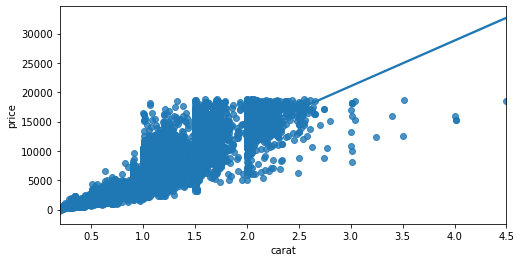

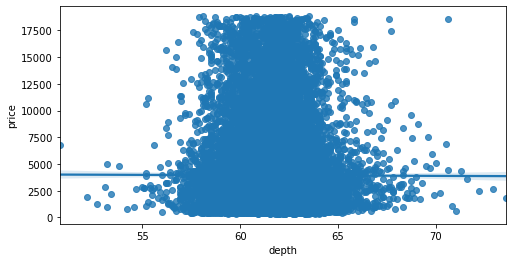

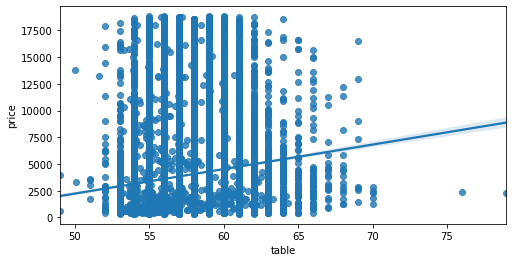

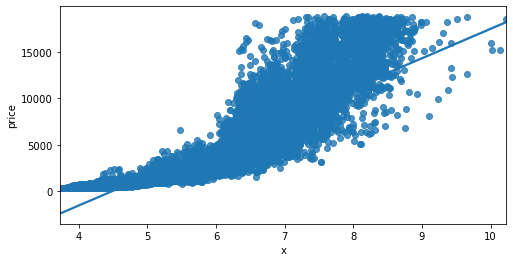

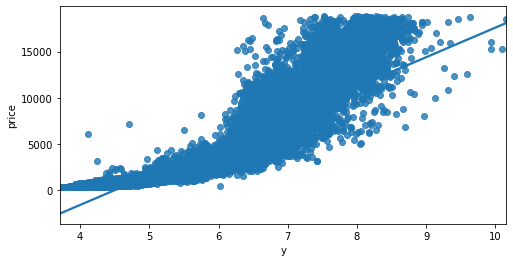

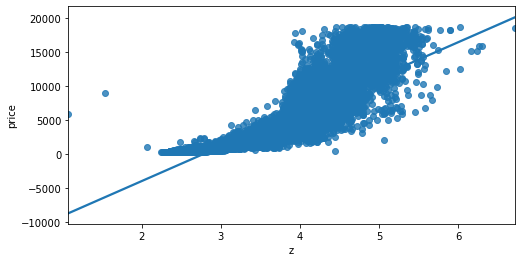

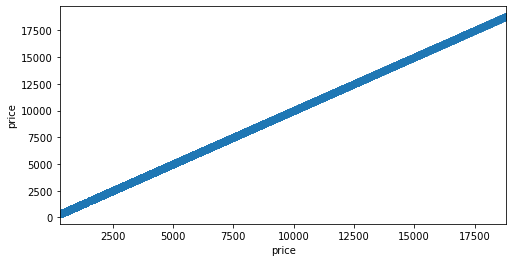

In [293]:
# lets check the linearilty between DV and IVs

for i in df.select_dtypes(['float64','int64']).columns:
    plt.figure(figsize=(8,4))
    sns.regplot(x=i, y='price', data=df, marker='o', x_ci='ci')
    plt.show()
    print('=================================================================================================')

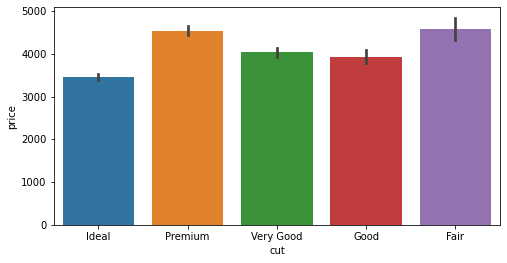

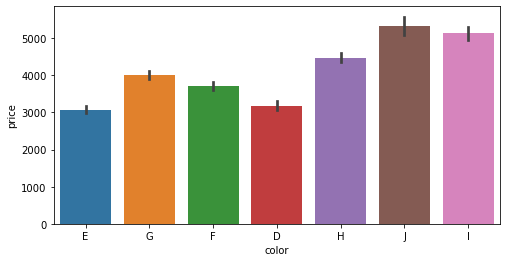

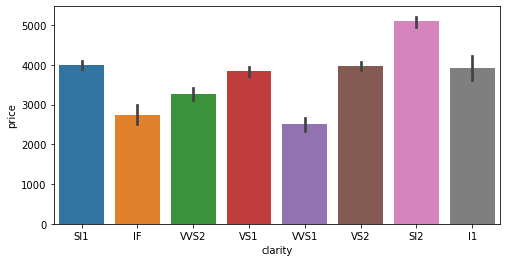

In [294]:
# check object variablle impact on price

for i in df.select_dtypes(['object']).columns:
    plt.figure(figsize=(8,4))
    sns.barplot(x=i, y='price', data=df)
    plt.show()
    print('=================================================================================================')

## Assumptions of Linear Regression:

### Test of Assumption : The independent variables should not be correlated

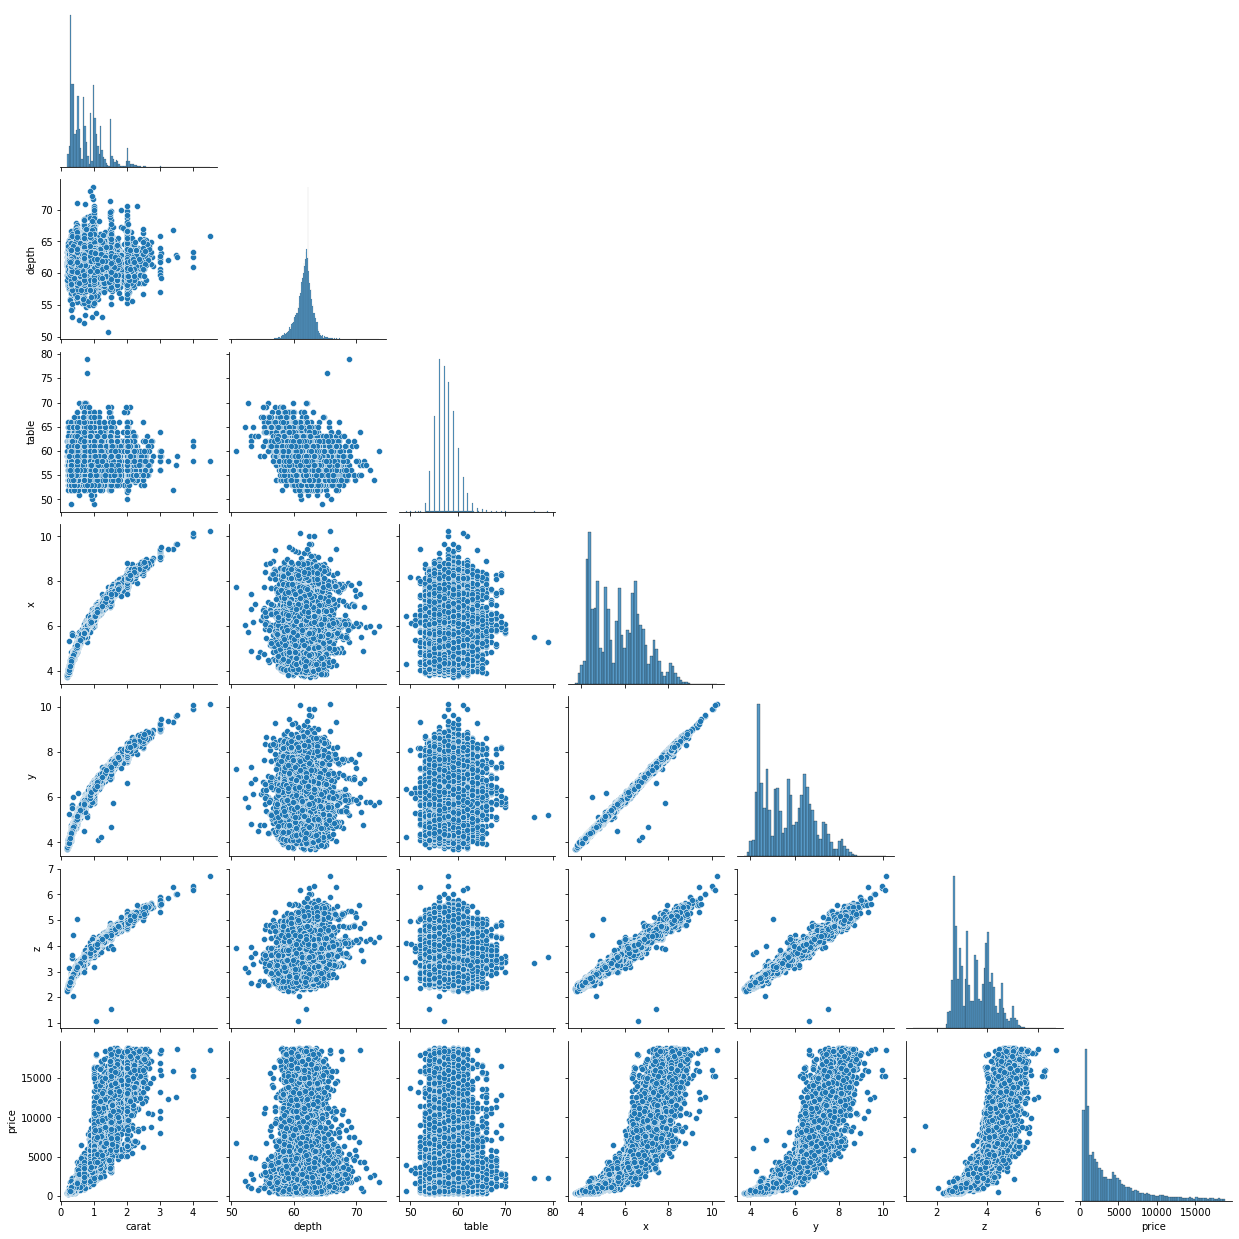

In [295]:
sns.pairplot(data=df, corner=True)

In [296]:
df_scaled.corr()

,carat,depth,table,x,y,z,price,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
carat,1.000000,0.035408,0.181689,0.977846,0.976777,0.976445,0.922397,0.034466,-0.165981,0.110396,...,0.099540,0.167465,0.180879,-0.117595,0.060927,0.269641,-0.063415,-0.033964,-0.168979,-0.138150
depth,0.035408,1.000000,-0.293755,-0.017964,-0.021505,0.100671,-0.002319,0.138227,-0.022852,-0.195133,...,0.025433,0.028888,0.025925,-0.031958,0.043690,0.009617,-0.024443,-0.010105,-0.023201,-0.021078
table,0.181689,-0.293755,1.000000,0.197794,0.191726,0.157840,0.127096,0.176313,-0.550088,0.330649,...,0.005450,0.017170,0.036082,-0.083741,0.045977,0.092342,-0.025714,-0.005707,-0.066031,-0.057138
x,0.977846,-0.017964,0.197794,1.000000,0.998514,0.991129,0.887482,0.032515,-0.167204,0.122708,...,0.093536,0.152862,0.165366,-0.129459,0.077887,0.274449,-0.060610,-0.030936,-0.188088,-0.148945
y,0.976777,-0.021505,0.191726,0.998514,1.000000,0.990740,0.889018,0.036351,-0.161696,0.105278,...,0.091638,0.153351,0.166097,-0.127190,0.077581,0.271708,-0.059848,-0.031480,-0.186141,-0.146374
z,0.976445,0.100671,0.157840,0.991129,0.990740,1.000000,0.882646,0.049578,-0.166511,0.090347,...,0.095474,0.155013,0.168120,-0.131202,0.081571,0.272865,-0.062762,-0.032332,-0.188131,-0.149398
price,0.922397,-0.002319,0.127096,0.887482,0.889018,0.882646,1.000000,-0.000472,-0.098475,0.088095,...,0.056679,0.100270,0.082368,-0.055421,0.008193,0.129751,-0.010447,0.003810,-0.096529,-0.053833
cut_Good,0.034466,0.138227,0.176313,0.032515,0.036351,0.049578,-0.000472,1.000000,-0.258199,-0.184857,...,-0.006736,0.000970,0.017486,-0.036751,0.051368,0.039463,-0.014113,-0.018778,-0.034054,-0.038132
cut_Ideal,-0.165981,-0.022852,-0.550088,-0.167204,-0.161696,-0.166511,-0.098475,-0.258199,1.000000,-0.479784,...,-0.019376,-0.009683,-0.042366,0.107478,-0.085709,-0.102810,0.030060,0.014689,0.089489,0.075625
cut_Premium,0.110396,-0.195133,0.330649,0.122708,0.105278,0.090347,0.088095,-0.184857,-0.479784,1.000000,...,0.025700,0.000706,0.014379,-0.053936,0.025395,0.062905,-0.011370,0.027823,-0.055041,-0.067381


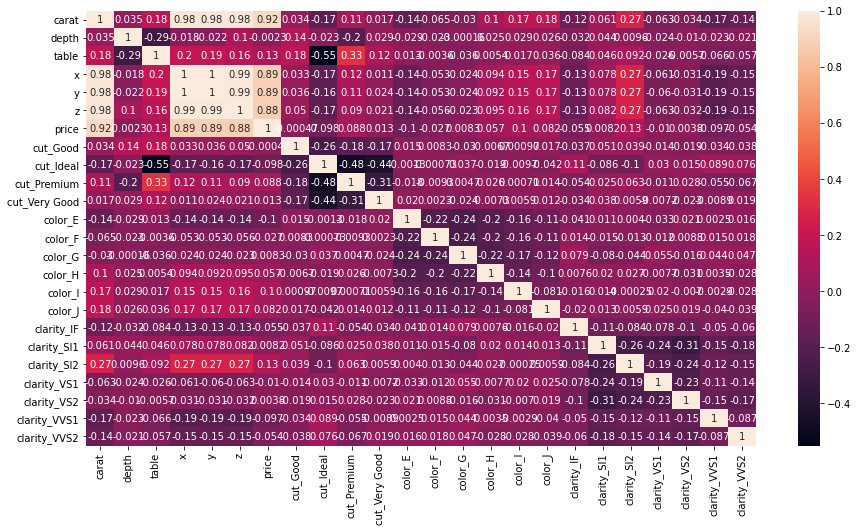

In [297]:
plt.figure(figsize=(15,8))
sns.heatmap(df_scaled.corr(),annot=True)
plt.show()

#### Observation: 

1. Carat, x, y and z have high correlation among them. While making models, we need to keep this in mind and select accordingly which variable is good to use.
2. For feature selection we will use VIF as well
3. D.V. has high correlation with carat,x,y and z. With rest of the variables correlation is very low.

### Test of Assumptionb: Linear Regression means that the dependent variable should be linearly related with the coefficients**

**We do not need to explicitly test this assumption as the Python code for Linear Regression makes sure that this particular assumption is met.**

**Rest 3 assumptions are dependent on error terms which we can see after model building**

In [298]:
df.skew()

carat    1.116534
depth   -0.027495
table    0.764905
x        0.402458
y        0.397781
z        0.400839
price    1.618631
dtype: float64

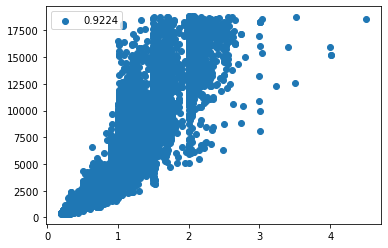

In [299]:
# Let us look at the scatterplot between 'carat' and 'price' and try to plot a line as well. 
# Also, we will check the Pearsonian Correlation Coefficient.

from scipy.stats import pearsonr

plt.scatter(df_knn['carat'],df_knn['price'],label=round(pearsonr(df_knn['carat'],df_knn['price'])[0],4))
plt.legend(loc = 'upper left');

In [300]:
import statsmodels.api as sm
import statsmodels.formula.api as SM

In [301]:
formula_SLR ='price~carat'
model_SLR = SM.ols(formula=formula_SLR,data=df_knn).fit() 
model_SLR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                 1.537e+05
Date:                Sun, 07 Feb 2021   Prob (F-statistic):               0.00
Time:                        20:53:48   Log-Likelihood:            -2.3634e+05
No. Observations:               26956   AIC:                         4.727e+05
Df Residuals:                   26954   BIC:                         4.727e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2264.1232     18.434   -122.822      0.000   -2300.255   -2227.991
carat       7770.6633     19.819    392.074      0.000    7731.816    7809.510
==============================================================================
Omnibus:                     6767.092   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            63291.140
Skew:                           0.941   Prob(JB):                         0.00
Kurtosis:                      10.267   Cond. No.                         3.63
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Model building without train and test split

In [302]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [303]:
df_model = df_knn.rename(columns={"cut_Very Good": "cut_Very_Good"})

In [304]:
df_model.columns

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'price', 'cut_Good',
       'cut_Ideal', 'cut_Premium', 'cut_Very_Good', 'color_E', 'color_F',
       'color_G', 'color_H', 'color_I', 'color_J', 'clarity_IF', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1',
       'clarity_VVS2'],
      dtype='object')

#### since 'x' and 'y' are perefectly correlated, we may drop one of them by ourselve, however, we will follow the process of eliminating variables wrt vif score and p-valuesmfor better clarity

In [305]:
# define X and y and calculate VIF with all variables

# divide data into X and y

X = df_model[['carat', 'depth', 'table', 'x', 'y', 'z', 'cut_Good','cut_Ideal', 'cut_Premium', 'cut_Very_Good',
            'color_E', 'color_F','color_G', 'color_H', 'color_I', 'color_J', 'clarity_IF', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1','clarity_VVS2']]
y = df_model.price

# calculate vif

vif = [variance_inflation_factor(X.values, ix) for ix in range(X.shape[1])] 
i=0
for column in X.columns:
    if i < 24:
        print (column ,"--->",  vif[i])
        i = i+1

carat ---> 93.70833983646459
depth ---> 1323.451969905219
table ---> 962.1206427047744
x ---> 12374.177623013371
y ---> 11801.0992902583
z ---> 3993.2126527037813
cut_Good ---> 4.480106857722151
cut_Ideal ---> 18.41916532200793
cut_Premium ---> 10.945591294062563
cut_Very_Good ---> 10.102351446433866
color_E ---> 2.4798148101362885
color_F ---> 2.4485719410649
color_G ---> 2.7962405089566023
color_H ---> 2.302912333630414
color_I ---> 1.9321929000198894
color_J ---> 1.5184059142258801
clarity_IF ---> 3.673987035428449
clarity_SI1 ---> 19.82547598260709
clarity_SI2 ---> 13.897513920775564
clarity_VS1 ---> 12.833954397078694
clarity_VS2 ---> 18.55817231857396
clarity_VVS1 ---> 6.446235329352147
clarity_VVS2 ---> 8.41281554744432


In [306]:
# Iteration 1: Run regression with all features

formula_SLR ='price~carat+depth+table+x+y+z+cut_Good+cut_Ideal+cut_Premium+cut_Very_Good+color_E+color_F+color_G+color_H+color_I+color_J+clarity_IF+clarity_SI1+clarity_SI2+clarity_VS1+clarity_VS2+clarity_VVS1+clarity_VVS2'
model_SLR = SM.ols(formula=formula_SLR,data=df_model).fit() 
model_SLR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                 1.381e+04
Date:                Sun, 07 Feb 2021   Prob (F-statistic):               0.00
Time:                        20:53:50   Log-Likelihood:            -2.2762e+05
No. Observations:               26956   AIC:                         4.553e+05
Df Residuals:                   26932   BIC:                         4.555e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -3422.9226    870.897     -3.930      0.000   -5129.927   -1715.918
carat          1.159e+04     72.666    159.509      0.000    1.14e+04    1.17e+04
depth            35.1098     12.481      2.813      0.005      10.646      59.574
table           -24.8340      4.123     -6.024      0.000     -32.914     -16.754
x             -1720.5756    136.485    -12.606      0.000   -1988.093   -1453.058
y              1648.6875    138.028     11.945      0.000    1378.146    1919.229
z             -1764.4599    184.895     -9.543      0.000   -2126.863   -1402.057
cut_Good        450.1193     48.519      9.277      0.000     355.019     545.220
cut_Ideal       734.9399     48.117     15.274      0.000     640.627     829.252
cut_Premium     682.9735     45.858     14.893      0.000     593.090     772.857
cut_Very_Good   589.0139     46.863     12.569      0.000     497.161     680.867
color_E        -203.1746     25.276     -8.038      0.000    -252.717    -153.632
color_F        -267.8803     25.612    -10.459      0.000    -318.081    -217.679
color_G        -466.2729     25.015    -18.640      0.000    -515.304    -417.242
color_H        -979.5062     26.679    -36.714      0.000   -1031.799    -927.214
color_I       -1507.1478     29.713    -50.723      0.000   -1565.387   -1448.909
color_J       -2374.2804     36.501    -65.047      0.000   -2445.825   -2302.736
clarity_IF     5262.9341     72.336     72.756      0.000    5121.151    5404.717
clarity_SI1    3667.3428     61.884     59.261      0.000    3546.046    3788.640
clarity_SI2    2697.2415     62.144     43.403      0.000    2575.435    2819.048
clarity_VS1    4575.9924     63.149     72.463      0.000    4452.217    4699.768
clarity_VS2    4272.0561     62.180     68.705      0.000    4150.181    4393.931
clarity_VVS1   4994.2156     66.799     74.764      0.000    4863.285    5125.146
clarity_VVS2   4939.4927     65.014     75.976      0.000    4812.063    5066.923
==============================================================================
Omnibus:                     7055.735   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           246990.286
Skew:                           0.582   Prob(JB):                         0.00
Kurtosis:                      17.783   Cond. No.                     1.10e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.1e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [307]:
# define X and y and calculate VIF after removing 'x'

# divide data into X and y

X = df_model[['carat', 'depth', 'table', 'y', 'z', 'cut_Good','cut_Ideal', 'cut_Premium', 'cut_Very_Good',
            'color_E', 'color_F','color_G', 'color_H', 'color_I', 'color_J', 'clarity_IF', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1','clarity_VVS2']]
y = df_model.price

# calculate vif

vif = [variance_inflation_factor(X.values, ix) for ix in range(X.shape[1])] 
i=0
for column in X.columns:
    if i < 24:
        print (column ,"--->",  vif[i])
        i = i+1

carat ---> 92.80140191219725
depth ---> 1300.880690254061
table ---> 918.2231399159442
y ---> 3228.428859912025
z ---> 3723.8088222834017
cut_Good ---> 4.413432061305959
cut_Ideal ---> 18.380119970436755
cut_Premium ---> 10.938274716193368
cut_Very_Good ---> 9.914961608306049
color_E ---> 2.479708131341984
color_F ---> 2.448231052327789
color_G ---> 2.7957122317221534
color_H ---> 2.3018902545512527
color_I ---> 1.9321849573047307
color_J ---> 1.5180806317441393
clarity_IF ---> 3.669361344387427
clarity_SI1 ---> 19.819319429178396
clarity_SI2 ---> 13.896285924406852
clarity_VS1 ---> 12.827965809700382
clarity_VS2 ---> 18.55077345741009
clarity_VVS1 ---> 6.438979816715968
clarity_VVS2 ---> 8.404847807164131


In [308]:
# Iteration 2: Run regression after dropping 'x'

formula_SLR ='price~carat+depth+table+y+z+cut_Good+cut_Ideal+cut_Premium+cut_Very_Good+color_E+color_F+color_G+color_H+color_I+color_J+clarity_IF+clarity_SI1+clarity_SI2+clarity_VS1+clarity_VS2+clarity_VVS1+clarity_VVS2'
model_SLR = SM.ols(formula=formula_SLR,data=df_model).fit() 
model_SLR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                 1.435e+04
Date:                Sun, 07 Feb 2021   Prob (F-statistic):               0.00
Time:                        20:53:51   Log-Likelihood:            -2.2770e+05
No. Observations:               26956   AIC:                         4.554e+05
Df Residuals:                   26933   BIC:                         4.556e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -6625.6520    835.456     -7.931      0.000   -8263.188   -4988.116
carat          1.146e+04     72.075    158.935      0.000    1.13e+04    1.16e+04
depth            84.9000     11.875      7.150      0.000      61.625     108.175
table           -27.6486      4.129     -6.697      0.000     -35.741     -19.556
y               533.0799    106.235      5.018      0.000     324.853     741.306
z             -2657.5827    171.283    -15.516      0.000   -2993.306   -2321.860
cut_Good        540.6766     48.125     11.235      0.000     446.349     635.004
cut_Ideal       807.1130     47.915     16.845      0.000     713.196     901.030
cut_Premium     704.2990     45.961     15.324      0.000     614.213     794.385
cut_Very_Good   696.4131     46.217     15.068      0.000     605.826     787.000
color_E        -203.4589     25.350     -8.026      0.000    -253.147    -153.771
color_F        -270.1715     25.686    -10.518      0.000    -320.518    -219.825
color_G        -469.8254     25.087    -18.728      0.000    -518.997    -420.654
color_H        -985.0986     26.754    -36.821      0.000   -1037.537    -932.660
color_I       -1506.9044     29.800    -50.567      0.000   -1565.314   -1448.495
color_J       -2366.8642     36.603    -64.663      0.000   -2438.609   -2295.120
clarity_IF     5313.7236     72.436     73.358      0.000    5171.746    5455.701
clarity_SI1    3691.5764     62.036     59.507      0.000    3569.983    3813.170
clarity_SI2    2716.8233     62.307     43.604      0.000    2594.699    2838.948
clarity_VS1    4607.0625     63.286     72.798      0.000    4483.019    4731.106
clarity_VS2    4300.3272     62.321     69.003      0.000    4178.175    4422.480
clarity_VVS1   5039.2125     66.899     75.325      0.000    4908.086    5170.339
clarity_VVS2   4979.3092     65.127     76.456      0.000    4851.657    5106.961
==============================================================================
Omnibus:                     6977.982   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           232550.498
Skew:                           0.583   Prob(JB):                         0.00
Kurtosis:                      17.342   Cond. No.                     1.05e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.05e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [309]:
# define X and y and calculate VIF after removing 'x', 'z'

# divide data into X and y

X = df_model[['carat', 'depth', 'table', 'y','cut_Good','cut_Ideal', 'cut_Premium', 'cut_Very_Good',
            'color_E', 'color_F','color_G', 'color_H', 'color_I', 'color_J', 'clarity_IF', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1','clarity_VVS2']]
y = df_model.price

# calculate vif

vif = [variance_inflation_factor(X.values, ix) for ix in range(X.shape[1])] 
i=0
for column in X.columns:
    if i < 24:
        print (column ,"--->",  vif[i])
        i = i+1

carat ---> 80.32653253144358
depth ---> 555.5936244044855
table ---> 601.116333005093
y ---> 573.2060061686054
cut_Good ---> 4.171829222752422
cut_Ideal ---> 15.399154834497418
cut_Premium ---> 9.95679647832211
cut_Very_Good ---> 8.882996629746364
color_E ---> 2.479386229386103
color_F ---> 2.447922858280973
color_G ---> 2.79562943413615
color_H ---> 2.3018849918886746
color_I ---> 1.9319407098807424
color_J ---> 1.5178729808724647
clarity_IF ---> 3.6087416324392443
clarity_SI1 ---> 19.627176029871812
clarity_SI2 ---> 13.761761602503864
clarity_VS1 ---> 12.66551235568261
clarity_VS2 ---> 18.336591666469744
clarity_VVS1 ---> 6.340919275056228
clarity_VVS2 ---> 8.281698873497817


In [310]:
# Iteration 3: Run regression after removing 'x','z' 

formula_SLR ='price~carat+depth+table+y+cut_Good+cut_Ideal+cut_Premium+cut_Very_Good+color_E+color_F+color_G+color_H+color_I+color_J+clarity_IF+clarity_SI1+clarity_SI2+clarity_VS1+clarity_VS2+clarity_VVS1+clarity_VVS2'
model_SLR = SM.ols(formula=formula_SLR,data=df_model).fit() 
model_SLR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                 1.489e+04
Date:                Sun, 07 Feb 2021   Prob (F-statistic):               0.00
Time:                        20:53:52   Log-Likelihood:            -2.2782e+05
No. Observations:               26956   AIC:                         4.557e+05
Df Residuals:                   26934   BIC:                         4.559e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2889.4040    569.891      5.070      0.000    1772.389    4006.419
carat          1.131e+04     71.769    157.568      0.000    1.12e+04    1.14e+04
depth           -74.3944      5.993    -12.413      0.000     -86.142     -62.647
table           -27.7778      4.147     -6.698      0.000     -35.906     -19.650
y             -1046.0799     30.585    -34.202      0.000   -1106.029    -986.131
cut_Good        620.3458     48.063     12.907      0.000     526.140     714.552
cut_Ideal       873.8120     47.934     18.229      0.000     779.859     967.765
cut_Premium     737.4499     46.115     15.992      0.000     647.062     827.838
cut_Very_Good   778.5393     46.116     16.882      0.000     688.149     868.930
color_E        -206.0616     25.462     -8.093      0.000    -255.969    -156.154
color_F        -272.1599     25.800    -10.549      0.000    -322.729    -221.590
color_G        -474.1723     25.196    -18.819      0.000    -523.559    -424.786
color_H        -990.0639     26.870    -36.846      0.000   -1042.731    -937.396
color_I       -1501.7383     29.930    -50.174      0.000   -1560.404   -1443.073
color_J       -2363.4681     36.765    -64.285      0.000   -2435.530   -2291.406
clarity_IF     5360.9682     72.693     73.748      0.000    5218.486    5503.450
clarity_SI1    3726.5361     62.270     59.845      0.000    3604.484    3848.589
clarity_SI2    2746.0015     62.555     43.897      0.000    2623.391    2868.613
clarity_VS1    4642.9943     63.524     73.090      0.000    4518.484    4767.505
clarity_VS2    4335.3394     62.557     69.302      0.000    4212.725    4457.954
clarity_VVS1   5079.8747     67.145     75.656      0.000    4948.267    5211.482
clarity_VVS2   5022.1346     65.357     76.841      0.000    4894.031    5150.238
==============================================================================
Omnibus:                     7000.073   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           215939.850
Skew:                           0.614   Prob(JB):                         0.00
Kurtosis:                      16.811   Cond. No.                     7.01e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.01e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**'table', 'depth' and 'y' are three highest and clsoest values. We may try dropping them one by one and see if one is more important than other**

In [311]:
# define X and y and calculate VIF after removing 'x', 'z' and 'y'

# divide data into X and y

X = df_model[['carat', 'depth', 'table', 'cut_Good','cut_Ideal', 'cut_Premium', 'cut_Very_Good',
            'color_E', 'color_F','color_G', 'color_H', 'color_I', 'color_J', 'clarity_IF', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1','clarity_VVS2']]
y = df_model.price

# calculate vif

vif = [variance_inflation_factor(X.values, ix) for ix in range(X.shape[1])] 
i=0
for column in X.columns:
    if i < 24:
        print (column ,"--->",  vif[i])
        i = i+1

carat ---> 5.032762510558362
depth ---> 530.7943372959355
table ---> 516.1080554684727
cut_Good ---> 4.11198132237769
cut_Ideal ---> 14.705997736487095
cut_Premium ---> 9.774552877958918
cut_Very_Good ---> 8.652930441839318
color_E ---> 2.4790656872100327
color_F ---> 2.4423835593483516
color_G ---> 2.790979614913153
color_H ---> 2.3018795710197555
color_I ---> 1.9309736659501762
color_J ---> 1.516168478836944
clarity_IF ---> 3.6020464689181964
clarity_SI1 ---> 19.421230062300413
clarity_SI2 ---> 13.634572417894802
clarity_VS1 ---> 12.570484505924806
clarity_VS2 ---> 18.2005073288398
clarity_VVS1 ---> 6.331272393131991
clarity_VVS2 ---> 8.250992496215845


In [312]:
# Iteration 4.a: Run regression after removing 'x','z' , 'y'

formula_SLR ='price~carat+depth+table+cut_Good+cut_Ideal+cut_Premium+cut_Very_Good+color_E+color_F+color_G+color_H+color_I+color_J+clarity_IF+clarity_SI1+clarity_SI2+clarity_VS1+clarity_VS2+clarity_VVS1+clarity_VVS2'
model_SLR = SM.ols(formula=formula_SLR,data=df_model).fit() 
model_SLR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                 1.493e+04
Date:                Sun, 07 Feb 2021   Prob (F-statistic):               0.00
Time:                        20:53:53   Log-Likelihood:            -2.2839e+05
No. Observations:               26956   AIC:                         4.568e+05
Df Residuals:                   26935   BIC:                         4.570e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -4497.4883    538.699     -8.349      0.000   -5553.367   -3441.610
carat          8920.8344     17.017    524.218      0.000    8887.479    8954.189
depth           -22.2366      5.921     -3.756      0.000     -33.841     -10.632
table           -24.9594      4.235     -5.893      0.000     -33.260     -16.658
cut_Good        579.9973     49.080     11.817      0.000     483.798     676.196
cut_Ideal       867.1253     48.963     17.710      0.000     771.156     963.095
cut_Premium     766.0925     47.097     16.266      0.000     673.780     858.405
cut_Very_Good   755.0345     47.101     16.030      0.000     662.714     847.355
color_E        -208.0801     26.009     -8.000      0.000    -259.059    -157.102
color_F        -304.3422     26.336    -11.556      0.000    -355.963    -252.722
color_G        -505.7425     25.720    -19.663      0.000    -556.155    -455.330
color_H        -986.7967     27.447    -35.953      0.000   -1040.594    -932.999
color_I       -1478.6121     30.565    -48.376      0.000   -1538.521   -1418.703
color_J       -2319.5195     37.531    -61.802      0.000   -2393.083   -2245.956
clarity_IF     5390.9356     74.248     72.607      0.000    5245.406    5536.466
clarity_SI1    3606.7773     63.506     56.794      0.000    3482.302    3731.252
clarity_SI2    2642.6806     63.823     41.406      0.000    2517.584    2767.777
clarity_VS1    4568.3234     64.849     70.445      0.000    4441.215    4695.432
clarity_VS2    4257.3039     63.857     66.669      0.000    4132.141    4382.467
clarity_VVS1   5112.3015     68.579     74.546      0.000    4977.883    5246.720
clarity_VVS2   5003.5476     66.758     74.951      0.000    4872.699    5134.397
==============================================================================
Omnibus:                     7363.617   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            72753.699
Skew:                           1.029   Prob(JB):                         0.00
Kurtosis:                      10.781   Cond. No.                     6.47e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.47e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [313]:
# define X and y and calculate VIF after removing 'x', 'z' and 'depth'

# divide data into X and y

X = df_model[['carat', 'table', 'y','cut_Good','cut_Ideal', 'cut_Premium', 'cut_Very_Good',
            'color_E', 'color_F','color_G', 'color_H', 'color_I', 'color_J', 'clarity_IF', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1','clarity_VVS2']]
y = df_model.price

# calculate vif

vif = [variance_inflation_factor(X.values, ix) for ix in range(X.shape[1])] 
i=0
for column in X.columns:
    if i < 24:
        print (column ,"--->",  vif[i])
        i = i+1

carat ---> 77.04683905845462
table ---> 274.12037118862315
y ---> 547.6205788078424
cut_Good ---> 4.16729275650209
cut_Ideal ---> 15.129352466337622
cut_Premium ---> 9.947176558268472
cut_Very_Good ---> 8.872120744903567
color_E ---> 2.475070391540524
color_F ---> 2.442740123977676
color_G ---> 2.7847295623162247
color_H ---> 2.289558175180382
color_I ---> 1.924766235488581
color_J ---> 1.5138872706220021
clarity_IF ---> 3.524377608032152
clarity_SI1 ---> 19.037371150745795
clarity_SI2 ---> 13.387806231130655
clarity_VS1 ---> 12.316649585976913
clarity_VS2 ---> 17.797112507069052
clarity_VVS1 ---> 6.1647846030596405
clarity_VVS2 ---> 8.050418892638778


In [314]:
# Iteration 4.b: Run regression after removing 'x','z','depth'

formula_SLR ='price~carat+table+y+cut_Good+cut_Ideal+cut_Premium+cut_Very_Good+color_E+color_F+color_G+color_H+color_I+color_J+clarity_IF+clarity_SI1+clarity_SI2+clarity_VS1+clarity_VS2+clarity_VVS1+clarity_VVS2'
model_SLR = SM.ols(formula=formula_SLR,data=df_model).fit() 
model_SLR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                 1.554e+04
Date:                Sun, 07 Feb 2021   Prob (F-statistic):               0.00
Time:                        20:53:54   Log-Likelihood:            -2.2790e+05
No. Observations:               26956   AIC:                         4.558e+05
Df Residuals:                   26935   BIC:                         4.560e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -3464.1527    251.250    -13.788      0.000   -3956.617   -2971.689
carat          1.108e+04     69.600    159.218      0.000    1.09e+04    1.12e+04
table            -7.0644      3.807     -1.856      0.064     -14.527       0.398
y              -949.4820     29.663    -32.009      0.000   -1007.623    -891.342
cut_Good        730.0624     47.377     15.410      0.000     637.201     822.924
cut_Ideal      1084.1964     44.965     24.112      0.000     996.063    1172.330
cut_Premium     928.0725     43.606     21.283      0.000     842.602    1013.543
cut_Very_Good   940.6352     44.354     21.207      0.000     853.699    1027.572
color_E        -205.7138     25.535     -8.056      0.000    -255.763    -155.665
color_F        -272.9130     25.873    -10.548      0.000    -323.626    -222.200
color_G        -481.9377     25.260    -19.079      0.000    -531.449    -432.426
color_H        -996.8606     26.941    -37.001      0.000   -1049.667    -944.055
color_I       -1510.0295     30.008    -50.321      0.000   -1568.847   -1451.212
color_J       -2369.4850     36.866    -64.272      0.000   -2441.745   -2297.225
clarity_IF     5411.1015     72.787     74.342      0.000    5268.436    5553.767
clarity_SI1    3737.6899     62.440     59.860      0.000    3615.304    3860.076
clarity_SI2    2763.9723     62.716     44.071      0.000    2641.046    2886.898
clarity_VS1    4670.3713     63.666     73.357      0.000    4545.583    4795.160
clarity_VS2    4355.8133     62.712     69.457      0.000    4232.894    4478.733
clarity_VVS1   5117.9056     67.265     76.086      0.000    4986.062    5249.749
clarity_VVS2   5054.5004     65.491     77.179      0.000    4926.136    5182.865
==============================================================================
Omnibus:                     7024.378   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           194895.970
Skew:                           0.654   Prob(JB):                         0.00
Kurtosis:                      16.108   Cond. No.                     2.15e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.15e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [315]:
# define X and y and calculate VIF after removing 'x', 'z' and 'table'

# divide data into X and y

X = df_model[['carat', 'depth', 'y','cut_Good','cut_Ideal', 'cut_Premium', 'cut_Very_Good',
            'color_E', 'color_F','color_G', 'color_H', 'color_I', 'color_J', 'clarity_IF', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1','clarity_VVS2']]
y = df_model.price

# calculate vif

vif = [variance_inflation_factor(X.values, ix) for ix in range(X.shape[1])] 
i=0
for column in X.columns:
    if i < 24:
        print (column ,"--->",  vif[i])
        i = i+1

carat ---> 71.14166072135646
depth ---> 253.36115854716408
y ---> 492.1447330296267
cut_Good ---> 4.159009020768566
cut_Ideal ---> 15.25316955331564
cut_Premium ---> 9.834868636537855
cut_Very_Good ---> 8.875203936825791
color_E ---> 2.475444509360264
color_F ---> 2.4475250014609813
color_G ---> 2.7955978529950123
color_H ---> 2.3018252691058154
color_I ---> 1.9315782100595094
color_J ---> 1.5175744330800174
clarity_IF ---> 3.5774362555817327
clarity_SI1 ---> 19.497534953348207
clarity_SI2 ---> 13.657622110171626
clarity_VS1 ---> 12.558406213020191
clarity_VS2 ---> 18.18310048588569
clarity_VVS1 ---> 6.269987891970097
clarity_VVS2 ---> 8.198429910310097


In [316]:
# Iteration 4.c: Run regression after removing 'x','z','table'

formula_SLR ='price~carat+depth+y+cut_Good+cut_Ideal+cut_Premium+cut_Very_Good+color_E+color_F+color_G+color_H+color_I+color_J+clarity_IF+clarity_SI1+clarity_SI2+clarity_VS1+clarity_VS2+clarity_VVS1+clarity_VVS2'
model_SLR = SM.ols(formula=formula_SLR,data=df_model).fit() 
model_SLR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                 1.560e+04
Date:                Sun, 07 Feb 2021   Prob (F-statistic):               0.00
Time:                        20:53:55   Log-Likelihood:            -2.2784e+05
No. Observations:               26956   AIC:                         4.557e+05
Df Residuals:                   26935   BIC:                         4.559e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       200.8247    404.895      0.496      0.620    -592.791     994.440
carat          1.129e+04     71.764    157.297      0.000    1.11e+04    1.14e+04
depth           -58.2391      5.491    -10.606      0.000     -69.002     -47.476
y             -1042.0088     30.604    -34.048      0.000   -1101.995    -982.023
cut_Good        657.9855     47.772     13.773      0.000     564.350     751.621
cut_Ideal       995.7140     44.381     22.435      0.000     908.724    1082.704
cut_Premium     792.3502     45.418     17.446      0.000     703.329     881.371
cut_Very_Good   844.5195     45.089     18.730      0.000     756.143     932.896
color_E        -208.2885     25.481     -8.174      0.000    -258.232    -158.345
color_F        -271.3016     25.821    -10.507      0.000    -321.912    -220.692
color_G        -473.4226     25.217    -18.774      0.000    -522.849    -423.997
color_H        -989.0506     26.892    -36.779      0.000   -1041.760    -936.341
color_I       -1502.9846     29.954    -50.176      0.000   -1561.697   -1444.273
color_J       -2364.1158     36.795    -64.251      0.000   -2436.236   -2291.996
clarity_IF     5375.7132     72.719     73.925      0.000    5233.181    5518.246
clarity_SI1    3732.1125     62.315     59.891      0.000    3609.971    3854.253
clarity_SI2    2751.5529     62.600     43.954      0.000    2628.853    2874.253
clarity_VS1    4651.1703     63.564     73.173      0.000    4526.581    4775.759
clarity_VS2    4341.5799     62.601     69.353      0.000    4218.879    4464.281
clarity_VVS1   5088.1085     67.188     75.729      0.000    4956.416    5219.801
clarity_VVS2   5029.9347     65.400     76.910      0.000    4901.747    5158.122
==============================================================================
Omnibus:                     7022.833   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           213003.615
Skew:                           0.624   Prob(JB):                         0.00
Kurtosis:                      16.714   Cond. No.                     3.67e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.67e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**We may see that dropping the 'table' gives best result of the three cases, hence we drop table first**

**After dropping table, we may again try between dropping 'y' and 'depth' alternatively to see which gives better results.**

In [317]:
# define X and y and calculate VIF after removing 'x', 'z', 'table','depth'

# divide data into X and y

X = df_model[['carat', 'y', 'cut_Good','cut_Ideal', 'cut_Premium', 'cut_Very_Good',
            'color_E', 'color_F','color_G', 'color_H', 'color_I', 'color_J', 'clarity_IF', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1','clarity_VVS2']]
y = df_model.price

# calculate vif

vif = [variance_inflation_factor(X.values, ix) for ix in range(X.shape[1])] 
i=0
for column in X.columns:
    if i < 24:
        print (column ,"--->",  vif[i])
        i = i+1

carat ---> 35.23924789204655
y ---> 192.02794479999102
cut_Good ---> 4.109099274067969
cut_Ideal ---> 15.129350175263191
cut_Premium ---> 9.779110276413919
cut_Very_Good ---> 8.812279106623533
color_E ---> 2.447936492846706
color_F ---> 2.431040264946553
color_G ---> 2.773555797970316
color_H ---> 2.2719471923443684
color_I ---> 1.9101963338126484
color_J ---> 1.5049494946234296
clarity_IF ---> 3.1888543102189466
clarity_SI1 ---> 17.15504119380912
clarity_SI2 ---> 12.075004355168735
clarity_VS1 ---> 11.04034312068375
clarity_VS2 ---> 15.886157313366523
clarity_VVS1 ---> 5.437569792825627
clarity_VVS2 ---> 7.143026909292927


In [318]:
# Iteration 5.a: Run regression after dropping 'x','z','table','depth'

formula_SLR ='price~carat+y+cut_Good+cut_Ideal+cut_Premium+cut_Very_Good+color_E+color_F+color_G+color_H+color_I+color_J+clarity_IF+clarity_SI1+clarity_SI2+clarity_VS1+clarity_VS2+clarity_VVS1+clarity_VVS2'
model_SLR = SM.ols(formula=formula_SLR,data=df_model).fit() 
model_SLR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                 1.635e+04
Date:                Sun, 07 Feb 2021   Prob (F-statistic):               0.00
Time:                        20:53:56   Log-Likelihood:            -2.2790e+05
No. Observations:               26956   AIC:                         4.558e+05
Df Residuals:                   26936   BIC:                         4.560e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -3861.3334    131.576    -29.347      0.000   -4119.229   -3603.438
carat          1.109e+04     69.439    159.714      0.000     1.1e+04    1.12e+04
y              -954.6122     29.535    -32.321      0.000   -1012.502    -896.722
cut_Good        734.2543     47.325     15.515      0.000     641.494     827.015
cut_Ideal      1107.3245     43.205     25.630      0.000    1022.641    1192.008
cut_Premium     932.1707     43.552     21.404      0.000     846.806    1017.535
cut_Very_Good   949.9755     44.070     21.556      0.000     863.597    1036.354
color_E        -206.4125     25.533     -8.084      0.000    -256.458    -156.367
color_F        -272.6029     25.874    -10.536      0.000    -323.317    -221.889
color_G        -481.1985     25.258    -19.051      0.000    -530.706    -431.691
color_H        -996.1052     26.939    -36.976      0.000   -1048.908    -943.303
color_I       -1509.8613     30.009    -50.313      0.000   -1568.681   -1451.042
color_J       -2369.2850     36.868    -64.264      0.000   -2441.548   -2297.022
clarity_IF     5412.2723     72.787     74.357      0.000    5269.606    5554.939
clarity_SI1    3738.6471     62.441     59.875      0.000    3616.260    3861.035
clarity_SI2    2764.4726     62.718     44.078      0.000    2641.542    2887.403
clarity_VS1    4671.0483     63.668     73.366      0.000    4546.256    4795.841
clarity_VS2    4356.3578     62.715     69.463      0.000    4233.434    4479.282
clarity_VVS1   5117.8981     67.268     76.082      0.000    4986.049    5249.747
clarity_VVS2   5054.7346     65.493     77.179      0.000    4926.364    5183.105
==============================================================================
Omnibus:                     7029.102   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           195392.076
Skew:                           0.654   Prob(JB):                         0.00
Kurtosis:                      16.125   Cond. No.                         156.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [319]:
# define X and y and calculate VIF after removing 'x', 'z', 'table','y'

# divide data into X and y

X = df_model[['carat', 'depth', 'cut_Good','cut_Ideal', 'cut_Premium', 'cut_Very_Good',
            'color_E', 'color_F','color_G', 'color_H', 'color_I', 'color_J', 'clarity_IF', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1','clarity_VVS2']]
y = df_model.price

# calculate vif

vif = [variance_inflation_factor(X.values, ix) for ix in range(X.shape[1])] 
i=0
for column in X.columns:
    if i < 24:
        print (column ,"--->",  vif[i])
        i = i+1

carat ---> 4.969830650511054
depth ---> 98.85795641548856
cut_Good ---> 4.06292745285232
cut_Ideal ---> 14.700453892233694
cut_Premium ---> 9.471944841446282
cut_Very_Good ---> 8.568868883376785
color_E ---> 2.4734372725887646
color_F ---> 2.4397073530775715
color_G ---> 2.790512643643648
color_H ---> 2.3017933566875217
color_I ---> 1.9309108288765484
color_J ---> 1.5161649001849853
clarity_IF ---> 3.551799969152611
clarity_SI1 ---> 19.09317892132582
clarity_SI2 ---> 13.391514124782441
clarity_VS1 ---> 12.341709329095638
clarity_VS2 ---> 17.872716800513906
clarity_VVS1 ---> 6.2241543640313255
clarity_VVS2 ---> 8.104655588091104


In [320]:
# Iteration 5.b: Run regression after dropping 'x','z','table','y'

formula_SLR ='price~carat+depth+cut_Good+cut_Ideal+cut_Premium+cut_Very_Good+color_E+color_F+color_G+color_H+color_I+color_J+clarity_IF+clarity_SI1+clarity_SI2+clarity_VS1+clarity_VS2+clarity_VVS1+clarity_VVS2'
model_SLR = SM.ols(formula=formula_SLR,data=df_model).fit() 
model_SLR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                 1.569e+04
Date:                Sun, 07 Feb 2021   Prob (F-statistic):               0.00
Time:                        20:53:57   Log-Likelihood:            -2.2841e+05
No. Observations:               26956   AIC:                         4.569e+05
Df Residuals:                   26936   BIC:                         4.570e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -6888.3925    354.644    -19.423      0.000   -7583.513   -6193.272
carat          8911.1647     16.949    525.771      0.000    8877.944    8944.385
depth            -7.8971      5.401     -1.462      0.144     -18.483       2.689
cut_Good        613.9726     48.771     12.589      0.000     518.380     709.565
cut_Ideal       976.7255     45.322     21.551      0.000     887.892    1065.559
cut_Premium     815.3418     46.379     17.580      0.000     724.437     906.247
cut_Very_Good   814.4259     46.039     17.690      0.000     724.187     904.665
color_E        -210.0747     26.023     -8.073      0.000    -261.081    -159.069
color_F        -303.4581     26.352    -11.515      0.000    -355.110    -251.806
color_G        -504.9582     25.736    -19.621      0.000    -555.402    -454.515
color_H        -985.8973     27.464    -35.898      0.000   -1039.728    -932.067
color_I       -1479.8134     30.584    -48.386      0.000   -1539.759   -1419.868
color_J       -2320.2554     37.555    -61.783      0.000   -2393.865   -2246.646
clarity_IF     5404.0850     74.261     72.772      0.000    5258.530    5549.640
clarity_SI1    3612.2088     63.539     56.850      0.000    3487.669    3736.749
clarity_SI2    2648.0321     63.857     41.468      0.000    2522.870    2773.195
clarity_VS1    4575.9340     64.877     70.532      0.000    4448.771    4703.097
clarity_VS2    4263.1864     63.889     66.728      0.000    4137.960    4388.413
clarity_VVS1   5119.5893     68.611     74.618      0.000    4985.108    5254.070
clarity_VVS2   5010.6241     66.789     75.022      0.000    4879.714    5141.534
==============================================================================
Omnibus:                     7378.629   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            72362.176
Skew:                           1.034   Prob(JB):                         0.00
Kurtosis:                      10.756   Cond. No.                     3.13e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**dropping 'depth' gives better results of Rsquare, Adjusted Rsquare and pvalues, however, on dropping 'y' first, pvalue of depth increase in model and rsquare and adjusted rsquare drops drastically.**

**Also we see after dropping 'depth', the next highest is 'y' its value is way above allowed VIF limit, hence, y needs to be dropped too.**

In [321]:
# define X and y and calculate VIF after removing 'x', 'z', 'table','y','depth'

# divide data into X and y

X = df_model[['carat', 'cut_Good','cut_Ideal', 'cut_Premium', 'cut_Very_Good',
            'color_E', 'color_F','color_G', 'color_H', 'color_I', 'color_J', 'clarity_IF', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1','clarity_VVS2']]
y = df_model.price

# calculate vif

vif = [variance_inflation_factor(X.values, ix) for ix in range(X.shape[1])] 
i=0
for column in X.columns:
    if i < 24:
        print (column ,"--->",  vif[i])
        i = i+1

carat ---> 4.636756853891552
cut_Good ---> 3.507665602466886
cut_Ideal ---> 12.472156743579866
cut_Premium ---> 8.192433054871715
cut_Very_Good ---> 7.373101467185009
color_E ---> 2.3700573445485453
color_F ---> 2.339801107961399
color_G ---> 2.683696187926399
color_H ---> 2.221261003374738
color_I ---> 1.8901891214413256
color_J ---> 1.4984910788072707
clarity_IF ---> 2.1163358289389973
clarity_SI1 ---> 8.562050883593676
clarity_SI2 ---> 6.321947503075611
clarity_VS1 ---> 5.816653200485915
clarity_VS2 ---> 8.121104959454678
clarity_VVS1 ---> 3.2372907007296776
clarity_VVS2 ---> 3.993986147028837


In [322]:
    # Iteration 6: Run regression after dropping 'x','z','table','depth','y'

formula_SLR ='price~carat+cut_Good+cut_Ideal+cut_Premium+cut_Very_Good+color_E+color_F+color_G+color_H+color_I+color_J+clarity_IF+clarity_SI1+clarity_SI2+clarity_VS1+clarity_VS2+clarity_VVS1+clarity_VVS2'
model_SLR = SM.ols(formula=formula_SLR,data=df_model).fit() 
model_SLR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                 1.656e+04
Date:                Sun, 07 Feb 2021   Prob (F-statistic):               0.00
Time:                        20:53:58   Log-Likelihood:            -2.2841e+05
No. Observations:               26956   AIC:                         4.569e+05
Df Residuals:                   26937   BIC:                         4.570e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -7395.3439     74.596    -99.138      0.000   -7541.556   -7249.131
carat          8911.3805     16.948    525.793      0.000    8878.161    8944.600
cut_Good        625.6626     48.112     13.004      0.000     531.361     719.964
cut_Ideal       993.2756     43.887     22.633      0.000     907.256    1079.296
cut_Premium     835.5014     44.283     18.867      0.000     748.704     922.298
cut_Very_Good   830.2124     44.756     18.550      0.000     742.488     917.937
color_E        -209.7786     26.023     -8.061      0.000    -260.784    -158.773
color_F        -303.2540     26.353    -11.508      0.000    -354.907    -251.601
color_G        -505.7083     25.731    -19.653      0.000    -556.143    -455.274
color_H        -986.9673     27.455    -35.949      0.000   -1040.780    -933.155
color_I       -1481.1029     30.572    -48.447      0.000   -1541.025   -1421.181
color_J       -2321.5490     37.545    -61.834      0.000   -2395.139   -2247.959
clarity_IF     5409.0820     74.184     72.915      0.000    5263.678    5554.486
clarity_SI1    3614.6344     63.519     56.907      0.000    3490.134    3739.135
clarity_SI2    2651.1904     63.821     41.541      0.000    2526.097    2776.284
clarity_VS1    4579.7627     64.826     70.647      0.000    4452.701    4706.824
clarity_VS2    4266.3082     63.855     66.813      0.000    4141.149    4391.467
clarity_VVS1   5123.5584     68.559     74.732      0.000    4989.180    5257.937
clarity_VVS2   5014.4866     66.738     75.137      0.000    4883.677    5145.297
==============================================================================
Omnibus:                     7374.292   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            72455.883
Skew:                           1.033   Prob(JB):                         0.00
Kurtosis:                      10.762   Cond. No.                         38.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**As we may notice, 'cut_Ideal', 'clarity_SI1' and 'cut_Premium', 'clarity_VS2', 'cut_Very_Good' have five highest and close vif values, we may try one at a time to see the results**

In [323]:
# define X and y and calculate VIF after removing 'x', 'z', 'table','y','depth','cut_Ideal',

# divide data into X and y

X = df_model[['carat', 'cut_Good', 'cut_Premium', 'cut_Very_Good',
            'color_E', 'color_F','color_G', 'color_H', 'color_I', 'color_J', 'clarity_IF', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1','clarity_VVS2']]
y = df_model.price

# calculate vif

vif = [variance_inflation_factor(X.values, ix) for ix in range(X.shape[1])] 
i=0
for column in X.columns:
    if i < 24:
        print (column ,"--->",  vif[i])
        i = i+1

carat ---> 4.621460247958126
cut_Good ---> 1.2275681558350338
cut_Premium ---> 1.6416851749465637
cut_Very_Good ---> 1.5381057154695645
color_E ---> 2.3448261268109047
color_F ---> 2.322953355882342
color_G ---> 2.6620228550486704
color_H ---> 2.2084012624825067
color_I ---> 1.882208904797712
color_J ---> 1.49716971211061
clarity_IF ---> 1.2760095831996374
clarity_SI1 ---> 3.1412890889312526
clarity_SI2 ---> 2.796330334495786
clarity_VS1 ---> 2.3140762864747932
clarity_VS2 ---> 2.9026486692908704
clarity_VVS1 ---> 1.5525189854201258
clarity_VVS2 ---> 1.7413674985215597


In [324]:
# Iteration 7a: Run regression after dropping 'x','z','table','y','cut_Ideal',

formula_SLR ='price~carat+cut_Good+cut_Premium+cut_Very_Good+color_E+color_F+color_G+color_H+color_I+color_J+clarity_IF+clarity_SI1+clarity_SI2+clarity_VS1+clarity_VS2+clarity_VVS1+clarity_VVS2'
model_SLR = SM.ols(formula=formula_SLR,data=df_model).fit() 
model_SLR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                 1.718e+04
Date:                Sun, 07 Feb 2021   Prob (F-statistic):               0.00
Time:                        20:53:59   Log-Likelihood:            -2.2867e+05
No. Observations:               26956   AIC:                         4.574e+05
Df Residuals:                   26938   BIC:                         4.575e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -6647.2689     67.505    -98.470      0.000   -6779.583   -6514.955
carat          8885.1858     17.069    520.558      0.000    8851.730    8918.641
cut_Good       -289.6661     26.306    -11.011      0.000    -341.228    -238.104
cut_Premium     -80.9242     18.099     -4.471      0.000    -116.399     -45.450
cut_Very_Good   -91.7800     18.712     -4.905      0.000    -128.456     -55.104
color_E        -211.4593     26.268     -8.050      0.000    -262.947    -159.972
color_F        -313.8125     26.597    -11.799      0.000    -365.945    -261.680
color_G        -510.2312     25.973    -19.644      0.000    -561.141    -459.322
color_H        -996.4318     27.711    -35.958      0.000   -1050.746    -942.117
color_I       -1484.8666     30.860    -48.117      0.000   -1545.353   -1424.380
color_J       -2338.7380     37.892    -61.721      0.000   -2413.008   -2264.468
clarity_IF     5646.1998     74.134     76.162      0.000    5500.893    5791.506
clarity_SI1    3810.4762     63.521     59.988      0.000    3685.972    3934.981
clarity_SI2    2832.0259     63.917     44.308      0.000    2706.744    2957.307
clarity_VS1    4787.3167     64.780     73.901      0.000    4660.345    4914.289
clarity_VS2    4474.1239     63.788     70.140      0.000    4349.096    4599.152
clarity_VVS1   5350.2618     68.464     78.147      0.000    5216.069    5484.454
clarity_VVS2   5231.1367     66.672     78.461      0.000    5100.457    5361.817
==============================================================================
Omnibus:                     7155.636   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            67939.655
Skew:                           1.004   Prob(JB):                         0.00
Kurtosis:                      10.514   Cond. No.                         36.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [325]:
# define X and y and calculate VIF after removing 'x', 'z', 'table','y','depth','cut_Premium',

# divide data into X and y

X = df_model[['carat', 'cut_Good', 'cut_Ideal', 'cut_Very_Good',
            'color_E', 'color_F','color_G', 'color_H', 'color_I', 'color_J', 'clarity_IF', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1','clarity_VVS2']]
y = df_model.price

# calculate vif

vif = [variance_inflation_factor(X.values, ix) for ix in range(X.shape[1])] 
i=0
for column in X.columns:
    if i < 24:
        print (column ,"--->",  vif[i])
        i = i+1

carat ---> 4.589704329442923
cut_Good ---> 1.3097950392996838
cut_Ideal ---> 2.4993008412035773
cut_Very_Good ---> 1.791276605063513
color_E ---> 2.343760681244808
color_F ---> 2.321408998986929
color_G ---> 2.660127597228422
color_H ---> 2.206306603901708
color_I ---> 1.8829185514968758
color_J ---> 1.4967993645204538
clarity_IF ---> 1.4069889986442896
clarity_SI1 ---> 3.506525511402232
clarity_SI2 ---> 3.0036225002047527
clarity_VS1 ---> 2.635742574846128
clarity_VS2 ---> 3.3180944943011315
clarity_VVS1 ---> 1.763519731470384
clarity_VVS2 ---> 2.016497277844308


In [326]:
# Iteration 7.b: Run regression after dropping 'x','z','table','depth','y',cut_Premium

formula_SLR ='price~carat+cut_Good+cut_Ideal+cut_Very_Good+color_E+color_F+color_G+color_H+color_I+color_J+clarity_IF+clarity_SI1+clarity_SI2+clarity_VS1+clarity_VS2+clarity_VVS1+clarity_VVS2'
model_SLR = SM.ols(formula=formula_SLR,data=df_model).fit() 
model_SLR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                 1.729e+04
Date:                Sun, 07 Feb 2021   Prob (F-statistic):               0.00
Time:                        20:54:00   Log-Likelihood:            -2.2859e+05
No. Observations:               26956   AIC:                         4.572e+05
Df Residuals:                   26938   BIC:                         4.574e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -6787.8502     67.731   -100.217      0.000   -6920.607   -6655.093
carat          8902.6565     17.053    522.046      0.000    8869.231    8936.082
cut_Good       -125.8959     27.159     -4.636      0.000    -179.128     -72.663
cut_Ideal       236.1589     17.886     13.204      0.000     201.102     271.216
cut_Very_Good    75.3912     20.196      3.733      0.000      35.806     114.976
color_E        -208.7864     26.193     -7.971      0.000    -260.127    -157.446
color_F        -308.9732     26.524    -11.649      0.000    -360.961    -256.985
color_G        -506.4993     25.900    -19.556      0.000    -557.265    -455.734
color_H        -990.8020     27.634    -35.854      0.000   -1044.967    -936.637
color_I       -1484.6154     30.772    -48.246      0.000   -1544.930   -1424.301
color_J       -2332.4253     37.787    -61.725      0.000   -2406.490   -2258.360
clarity_IF     5571.7961     74.165     75.127      0.000    5426.429    5717.163
clarity_SI1    3772.3088     63.380     59.519      0.000    3648.080    3896.537
clarity_SI2    2799.1514     63.754     43.906      0.000    2674.191    2924.112
clarity_VS1    4739.5676     64.692     73.264      0.000    4612.768    4866.367
clarity_VS2    4430.0156     63.678     69.569      0.000    4305.203    4554.828
clarity_VVS1   5288.0551     68.449     77.256      0.000    5153.892    5422.218
clarity_VVS2   5172.0756     66.648     77.603      0.000    5041.442    5302.709
==============================================================================
Omnibus:                     7224.141   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            68884.107
Skew:                           1.015   Prob(JB):                         0.00
Kurtosis:                      10.564   Cond. No.                         37.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [327]:
# define X and y and calculate VIF after removing 'x', 'z', 'table','y','depth','cut_Very_Good',

# divide data into X and y

X = df_model[['carat', 'cut_Good', 'cut_Ideal', 'cut_Premium',
            'color_E', 'color_F','color_G', 'color_H', 'color_I', 'color_J', 'clarity_IF', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1','clarity_VVS2']]
y = df_model.price

# calculate vif

vif = [variance_inflation_factor(X.values, ix) for ix in range(X.shape[1])] 
i=0
for column in X.columns:
    if i < 24:
        print (column ,"--->",  vif[i])
        i = i+1

carat ---> 4.606539920846219
cut_Good ---> 1.344572941477482
cut_Ideal ---> 2.601821724129421
cut_Premium ---> 1.9903311700040212
color_E ---> 2.3428920589800777
color_F ---> 2.3224130776633474
color_G ---> 2.66491903455933
color_H ---> 2.20906646408821
color_I ---> 1.882624897032083
color_J ---> 1.4966152244243147
clarity_IF ---> 1.3949998120363536
clarity_SI1 ---> 3.4588078920858236
clarity_SI2 ---> 3.022995830654835
clarity_VS1 ---> 2.6154218616824396
clarity_VS2 ---> 3.3575039636578046
clarity_VVS1 ---> 1.7284874522271556
clarity_VVS2 ---> 1.9389322809272138


In [328]:
# Iteration 7.c: Run regression after dropping 'x','z','table','depth','y',cut_Very_Good

formula_SLR ='price~carat+cut_Good+cut_Ideal+cut_Premium+color_E+color_F+color_G+color_H+color_I+color_J+clarity_IF+clarity_SI1+clarity_SI2+clarity_VS1+clarity_VS2+clarity_VVS1+clarity_VVS2'
model_SLR = SM.ols(formula=formula_SLR,data=df_model).fit() 
model_SLR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                 1.729e+04
Date:                Sun, 07 Feb 2021   Prob (F-statistic):               0.00
Time:                        20:54:00   Log-Likelihood:            -2.2858e+05
No. Observations:               26956   AIC:                         4.572e+05
Df Residuals:                   26938   BIC:                         4.574e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -6807.5133     67.959   -100.171      0.000   -6940.717   -6674.310
carat         8897.9832     17.041    522.165      0.000    8864.583    8931.384
cut_Good      -108.2094     27.552     -3.928      0.000    -162.212     -54.207
cut_Ideal      252.3004     18.292     13.793      0.000     216.447     288.154
cut_Premium    101.2330     19.978      5.067      0.000      62.075     140.391
color_E       -207.2124     26.187     -7.913      0.000    -258.541    -155.884
color_F       -309.1092     26.518    -11.657      0.000    -361.086    -257.133
color_G       -509.9723     25.894    -19.695      0.000    -560.725    -459.220
color_H       -993.5648     27.627    -35.964      0.000   -1047.715    -939.415
color_I      -1483.2630     30.765    -48.212      0.000   -1543.565   -1422.961
color_J      -2330.5495     37.780    -61.687      0.000   -2404.601   -2256.498
clarity_IF    5581.7251     74.065     75.363      0.000    5436.554    5726.896
clarity_SI1   3780.1688     63.288     59.730      0.000    3656.121    3904.217
clarity_SI2   2802.9541     63.697     44.005      0.000    2678.105    2927.803
clarity_VS1   4746.6022     64.606     73.470      0.000    4619.971    4873.234
clarity_VS2   4433.0167     63.621     69.679      0.000    4308.317    4557.716
clarity_VVS1  5299.8749     68.328     77.566      0.000    5165.949    5433.801
clarity_VVS2  5188.0401     66.498     78.017      0.000    5057.700    5318.381
==============================================================================
Omnibus:                     7222.351   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            69473.840
Skew:                           1.012   Prob(JB):                         0.00
Kurtosis:                      10.600   Cond. No.                         37.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [329]:
# define X and y and calculate VIF after removing 'x', 'z', 'table','y','depth','clarity_VS2'

# divide data into X and y

X = df_model[['carat', 'cut_Good', 'cut_Ideal', 'cut_Premium','cut_Very_Good',
            'color_E', 'color_F','color_G', 'color_H', 'color_I', 'color_J', 'clarity_IF', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VVS1','clarity_VVS2']]
y = df_model.price

# calculate vif

vif = [variance_inflation_factor(X.values, ix) for ix in range(X.shape[1])] 
i=0
for column in X.columns:
    if i < 24:
        print (column ,"--->",  vif[i])
        i = i+1

carat ---> 4.559082301006944
cut_Good ---> 1.8310672833191288
cut_Ideal ---> 4.457803384598811
cut_Premium ---> 3.347237494160616
cut_Very_Good ---> 3.0482572906171512
color_E ---> 2.2383241926530615
color_F ---> 2.211384796062212
color_G ---> 2.5426181974831024
color_H ---> 2.1321980037168533
color_I ---> 1.8331827947188177
color_J ---> 1.4629940761317235
clarity_IF ---> 1.168237692820439
clarity_SI1 ---> 1.952746129615209
clarity_SI2 ---> 1.7464691010615145
clarity_VS1 ---> 1.604058830354743
clarity_VVS1 ---> 1.3109990936003695
clarity_VVS2 ---> 1.3914578392939934


In [330]:
# Iteration 7.d: Run regression after dropping 'x','z','table','depth','y',clarity_VS2

formula_SLR ='price~carat+cut_Good+cut_Ideal+cut_Premium+cut_Very_Good+color_E+color_F+color_G+color_H+color_I+color_J+clarity_IF+clarity_SI1+clarity_SI2+clarity_VS1+clarity_VVS1+clarity_VVS2'
model_SLR = SM.ols(formula=formula_SLR,data=df_model).fit() 
model_SLR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                 1.482e+04
Date:                Sun, 07 Feb 2021   Prob (F-statistic):               0.00
Time:                        20:54:01   Log-Likelihood:            -2.3048e+05
No. Observations:               26956   AIC:                         4.610e+05
Df Residuals:                   26938   BIC:                         4.611e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -3660.4861     53.328    -68.640      0.000   -3765.013   -3555.960
carat          8779.0905     18.173    483.075      0.000    8743.470    8814.711
cut_Good        988.1160     51.613     19.145      0.000     886.951    1089.281
cut_Ideal      1414.9099     46.890     30.175      0.000    1323.002    1506.817
cut_Premium    1237.5328     47.367     26.126      0.000    1144.690    1330.375
cut_Very_Good  1251.0736     47.841     26.151      0.000    1157.303    1344.844
color_E        -218.7306     28.095     -7.785      0.000    -273.799    -163.662
color_F        -310.3879     28.452    -10.909      0.000    -366.155    -254.621
color_G        -502.0518     27.781    -18.072      0.000    -556.504    -447.600
color_H       -1003.1731     29.641    -33.844      0.000   -1061.270    -945.076
color_I       -1466.5848     33.006    -44.434      0.000   -1531.278   -1401.891
color_J       -2265.4583     40.526    -55.901      0.000   -2344.891   -2186.025
clarity_IF     1325.4560     45.391     29.201      0.000    1236.488    1414.424
clarity_SI1    -404.5286     22.019    -18.372      0.000    -447.686    -361.371
clarity_SI2   -1327.6638     24.778    -53.583      0.000   -1376.229   -1279.098
clarity_VS1     537.0784     25.116     21.384      0.000     487.849     586.307
clarity_VVS1   1044.1350     33.665     31.016      0.000     978.150    1110.120
clarity_VVS2    951.1642     29.672     32.056      0.000     893.006    1009.323
==============================================================================
Omnibus:                     5416.960   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           192118.421
Skew:                           0.049   Prob(JB):                         0.00
Kurtosis:                      16.078   Cond. No.                         20.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [331]:
# define X and y and calculate VIF after removing 'x', 'z', 'table','y','depth','clarity_SI1'

# divide data into X and y

X = df_model[['carat', 'cut_Good','cut_Ideal', 'cut_Premium', 'cut_Very_Good',
            'color_E', 'color_F','color_G', 'color_H', 'color_I', 'color_J', 'clarity_IF', 
       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1','clarity_VVS2']]
y = df_model.price

# calculate vif

vif = [variance_inflation_factor(X.values, ix) for ix in range(X.shape[1])] 
i=0
for column in X.columns:
    if i < 24:
        print (column ,"--->",  vif[i])
        i = i+1

carat ---> 4.516367008203163
cut_Good ---> 1.777460793569994
cut_Ideal ---> 4.5758487571150335
cut_Premium ---> 3.3551512246216966
cut_Very_Good ---> 2.9785085244839458
color_E ---> 2.250211280634771
color_F ---> 2.2273459133524978
color_G ---> 2.5685231141456577
color_H ---> 2.1353570102169925
color_I ---> 1.8393305815126224
color_J ---> 1.4695634089971352
clarity_IF ---> 1.1796826823755127
clarity_SI2 ---> 1.6687908912552296
clarity_VS1 ---> 1.5988537199213997
clarity_VS2 ---> 1.852179634690267
clarity_VVS1 ---> 1.3248468547811851
clarity_VVS2 ---> 1.399744196042379


In [332]:
# Iteration 7.e: Run regression after dropping 'x','z','table','depth','y',clarity_SI1

formula_SLR ='price~carat+cut_Good+cut_Ideal+cut_Premium+cut_Very_Good+color_E+color_F+color_G+color_H+color_I+color_J+clarity_IF+clarity_SI2+clarity_VS1+clarity_VS2+clarity_VVS1+clarity_VVS2'
model_SLR = SM.ols(formula=formula_SLR,data=df_model).fit() 
model_SLR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                 1.548e+04
Date:                Sun, 07 Feb 2021   Prob (F-statistic):               0.00
Time:                        20:54:02   Log-Likelihood:            -2.2994e+05
No. Observations:               26956   AIC:                         4.599e+05
Df Residuals:                   26938   BIC:                         4.601e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -4200.5291     51.987    -80.799      0.000   -4302.427   -4098.631
carat          8816.8428     17.852    493.896      0.000    8781.853    8851.833
cut_Good        942.4788     50.579     18.634      0.000     843.342    1041.616
cut_Ideal      1333.4946     46.016     28.979      0.000    1243.301    1423.688
cut_Premium    1167.0511     46.461     25.119      0.000    1075.985    1258.117
cut_Very_Good  1188.0329     46.899     25.331      0.000    1096.107    1279.958
color_E        -230.0431     27.539     -8.353      0.000    -284.022    -176.065
color_F        -326.1282     27.888    -11.694      0.000    -380.790    -271.466
color_G        -525.6411     27.231    -19.303      0.000    -579.015    -472.267
color_H       -1006.4584     29.055    -34.639      0.000   -1063.408    -949.508
color_I       -1481.5566     32.356    -45.789      0.000   -1544.977   -1418.136
color_J       -2296.6464     39.734    -57.800      0.000   -2374.528   -2218.765
clarity_IF     1938.5018     44.701     43.366      0.000    1850.886    2026.117
clarity_SI2    -750.3360     23.672    -31.697      0.000    -796.735    -703.937
clarity_VS1    1134.5796     24.529     46.254      0.000    1086.501    1182.659
clarity_VS2     824.9372     21.699     38.017      0.000     782.406     867.468
clarity_VVS1   1652.9869     33.147     49.868      0.000    1588.017    1717.957
clarity_VVS2   1554.7182     29.132     53.367      0.000    1497.617    1611.819
==============================================================================
Omnibus:                     5437.471   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           167163.051
Skew:                           0.224   Prob(JB):                         0.00
Kurtosis:                      15.191   Cond. No.                         20.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [333]:
# define X and y and calculate VIF after removing 'x', 'z', 'table','y','depth', 'cut_Good'

# divide data into X and y

X = df_model[['carat','cut_Ideal', 'cut_Premium', 'cut_Very_Good',
            'color_E', 'color_F','color_G', 'color_H', 'color_I', 'color_J', 'clarity_IF','clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1','clarity_VVS2']]
y = df_model.price

# calculate vif

vif = [variance_inflation_factor(X.values, ix) for ix in range(X.shape[1])] 
i=0
for column in X.columns:
    if i < 24:
        print (column ,"--->",  vif[i])
        i = i+1

carat ---> 4.608521982189192
cut_Ideal ---> 4.364846649644775
cut_Premium ---> 3.059130883947203
cut_Very_Good ---> 2.826287865232295
color_E ---> 2.344927316571703
color_F ---> 2.3227416237081497
color_G ---> 2.667306091828829
color_H ---> 2.2105486881122767
color_I ---> 1.883622299782864
color_J ---> 1.4964022981754082
clarity_IF ---> 1.540341422819542
clarity_SI1 ---> 4.338700287574734
clarity_SI2 ---> 3.5744076352471867
clarity_VS1 ---> 3.2162691377825787
clarity_VS2 ---> 4.239369221855171
clarity_VVS1 ---> 2.0355791965456747
clarity_VVS2 ---> 2.375886673200529


In [334]:
# Iteration 7.f: Run regression after dropping 'x','z','table','depth','y',cut_Good

formula_SLR ='price~carat+cut_Ideal+cut_Premium+cut_Very_Good+color_E+color_F+color_G+color_H+color_I+color_J+clarity_IF+clarity_SI1+clarity_SI2+clarity_VS1+clarity_VS2+clarity_VVS1+clarity_VVS2'
model_SLR = SM.ols(formula=formula_SLR,data=df_model).fit() 
model_SLR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                 1.742e+04
Date:                Sun, 07 Feb 2021   Prob (F-statistic):               0.00
Time:                        20:54:03   Log-Likelihood:            -2.2850e+05
No. Observations:               26956   AIC:                         4.570e+05
Df Residuals:                   26938   BIC:                         4.572e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -7000.1175     68.337   -102.436      0.000   -7134.061   -6866.174
carat          8902.6228     16.988    524.059      0.000    8869.326    8935.920
cut_Ideal       513.5330     23.846     21.536      0.000     466.794     560.272
cut_Premium     358.7099     24.912     14.399      0.000     309.882     407.538
cut_Very_Good   351.6096     25.548     13.763      0.000     301.535     401.684
color_E        -207.6935     26.103     -7.957      0.000    -258.857    -156.530
color_F        -306.1399     26.434    -11.581      0.000    -357.952    -254.328
color_G        -508.9866     25.810    -19.720      0.000    -559.576    -458.397
color_H        -991.7220     27.538    -36.013      0.000   -1045.697    -937.746
color_I       -1482.9859     30.666    -48.359      0.000   -1543.094   -1422.878
color_J       -2325.9604     37.661    -61.761      0.000   -2399.777   -2252.144
clarity_IF     5502.8429     74.063     74.300      0.000    5357.676    5648.010
clarity_SI1    3710.2184     63.289     58.624      0.000    3586.169    3834.268
clarity_SI2    2739.1502     63.660     43.028      0.000    2614.374    2863.927
clarity_VS1    4672.9197     64.629     72.303      0.000    4546.243    4799.597
clarity_VS2    4359.9405     63.645     68.504      0.000    4235.192    4484.689
clarity_VVS1   5219.1511     68.376     76.330      0.000    5085.131    5353.171
clarity_VVS2   5106.3380     66.570     76.706      0.000    4975.857    5236.819
==============================================================================
Omnibus:                     7304.660   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            71009.921
Skew:                           1.024   Prob(JB):                         0.00
Kurtosis:                      10.683   Cond. No.                         38.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**The model has improved by dropping cut_Good instead of other cut types or clarity types as suggested through VIF. All the values like Rsquare, Adjusted Rsquare and pvalues are better. So, we finalise Iteration 7f as final.**

#### Feature Importance for without split final model

In [335]:
importance_tot = sm.OLS(y, X).fit()
print(importance_tot.params)

carat            8425.976338
cut_Ideal          16.703568
cut_Premium      -111.215927
cut_Very_Good    -100.569709
color_E          -831.436647
color_F          -912.373501
color_G         -1064.392466
color_H         -1548.438197
color_I         -1966.175923
color_J         -2755.662204
clarity_IF       -253.638764
clarity_SI1     -2005.533995
clarity_SI2     -2867.837384
clarity_VS1     -1044.279681
clarity_VS2     -1354.189289
clarity_VVS1     -557.486261
clarity_VVS2     -655.263075
dtype: float64


## Model building with train and test splt (70:30)

In [336]:
# import libraries

from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [337]:
# calculate vif for all features

X = df_model[['carat', 'depth', 'table', 'x', 'y', 'z', 'cut_Good','cut_Ideal', 'cut_Premium', 'cut_Very_Good',
            'color_E', 'color_F','color_G', 'color_H', 'color_I', 'color_J', 'clarity_IF', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1','clarity_VVS2']]
y = df_model.price

# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

# calculate vif on new X_train

vif = [variance_inflation_factor(X_train.values, ix) for ix in range(X_train.shape[1])] 
i=0
for column in X_train.columns:
    if i < 24:
        print (column ,"--->",  vif[i])
        i = i+1

carat ---> 95.1139919078359
depth ---> 1379.0639191029932
table ---> 990.2312654368274
x ---> 15340.094813449607
y ---> 14756.110374870812
z ---> 4255.435452298177
cut_Good ---> 4.530345328563297
cut_Ideal ---> 18.780601668082408
cut_Premium ---> 10.995474451932493
cut_Very_Good ---> 10.334050342436367
color_E ---> 2.4836036086593296
color_F ---> 2.459958523637805
color_G ---> 2.791851483526843
color_H ---> 2.2838513790913972
color_I ---> 1.9350502679241124
color_J ---> 1.4968152624484221
clarity_IF ---> 3.5831814258285632
clarity_SI1 ---> 19.598035889408216
clarity_SI2 ---> 13.808062404094274
clarity_VS1 ---> 12.948015974209246
clarity_VS2 ---> 18.248350439822282
clarity_VVS1 ---> 6.12765706428243
clarity_VVS2 ---> 8.17274122030466


In [338]:
# Iteration 1:

train_X_sm = sm.add_constant(X_train)
model = sm.OLS(y_train,train_X_sm).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     9579.
Date:                Sun, 07 Feb 2021   Prob (F-statistic):               0.00
Time:                        20:54:04   Log-Likelihood:            -1.5929e+05
No. Observations:               18869   AIC:                         3.186e+05
Df Residuals:                   18845   BIC:                         3.188e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -4829.0752   1087.594     -4.440      0.000   -6960.858   -2697.293
carat          1.164e+04     87.313    133.274      0.000    1.15e+04    1.18e+04
depth            60.5107     15.773      3.836      0.000      29.594      91.428
table           -24.8232      4.933     -5.032      0.000     -34.492     -15.155
x             -1657.4665    179.757     -9.221      0.000   -2009.806   -1305.127
y              1778.5156    185.162      9.605      0.000    1415.581    2141.450
z             -2119.1461    236.842     -8.947      0.000   -2583.378   -1654.914
cut_Good        406.8112     58.186      6.992      0.000     292.761     520.862
cut_Ideal       682.2636     57.820     11.800      0.000     568.930     795.597
cut_Premium     609.1888     54.865     11.103      0.000     501.648     716.730
cut_Very_Good   545.3103     56.309      9.684      0.000     434.939     655.681
color_E        -186.5509     30.092     -6.199      0.000    -245.533    -127.568
color_F        -275.9328     30.437     -9.066      0.000    -335.591    -216.274
color_G        -467.5935     29.849    -15.665      0.000    -526.100    -409.087
color_H        -986.4399     31.928    -30.895      0.000   -1049.022    -923.857
color_I       -1495.3140     35.383    -42.261      0.000   -1564.668   -1425.960
color_J       -2338.0734     43.818    -53.359      0.000   -2423.961   -2252.186
clarity_IF     5310.3746     86.103     61.674      0.000    5141.604    5479.145
clarity_SI1    3656.5337     73.239     49.926      0.000    3512.978    3800.089
clarity_SI2    2695.7761     73.545     36.655      0.000    2551.622    2839.930
clarity_VS1    4563.3065     74.710     61.080      0.000    4416.868    4709.745
clarity_VS2    4276.5219     73.614     58.094      0.000    4132.233    4420.811
clarity_VVS1   4994.3060     79.460     62.853      0.000    4838.558    5150.054
clarity_VVS2   4929.0321     77.107     63.924      0.000    4777.895    5080.169
==============================================================================
Omnibus:                     5006.251   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           149261.457
Skew:                           0.653   Prob(JB):                         0.00
Kurtosis:                      16.716   Cond. No.                     1.15e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.15e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [339]:
# calculate vif dropping 'x' features

X = df_model[['carat', 'depth', 'table', 'y', 'z', 'cut_Good','cut_Ideal', 'cut_Premium', 'cut_Very_Good',
            'color_E', 'color_F','color_G', 'color_H', 'color_I', 'color_J', 'clarity_IF', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1','clarity_VVS2']]
y = df_model.price

# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

# calculate vif on new X_train

vif = [variance_inflation_factor(X_train.values, ix) for ix in range(X_train.shape[1])] 
i=0
for column in X_train.columns:
    if i < 24:
        print (column ,"--->",  vif[i])
        i = i+1

carat ---> 94.34024366391033
depth ---> 1358.5875928418461
table ---> 949.2686164407482
y ---> 3477.033087993481
z ---> 4009.1961871448043
cut_Good ---> 4.434087895308343
cut_Ideal ---> 18.683094197758614
cut_Premium ---> 10.99376320327727
cut_Very_Good ---> 10.040787986145219
color_E ---> 2.4835636492835302
color_F ---> 2.4598482775119064
color_G ---> 2.7913054945934386
color_H ---> 2.282955246733952
color_I ---> 1.9350452663059836
color_J ---> 1.4961527280892295
clarity_IF ---> 3.5764081871346396
clarity_SI1 ---> 19.5881095379309
clarity_SI2 ---> 13.805065629308814
clarity_VS1 ---> 12.939482700962715
clarity_VS2 ---> 18.23587472553206
clarity_VVS1 ---> 6.118458077678534
clarity_VVS2 ---> 8.162344214901207


In [340]:
# Iteration 2: dropping 'x' 

train_X_sm = sm.add_constant(X_train)
model = sm.OLS(y_train,train_X_sm).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     9966.
Date:                Sun, 07 Feb 2021   Prob (F-statistic):               0.00
Time:                        20:54:04   Log-Likelihood:            -1.5933e+05
No. Observations:               18869   AIC:                         3.187e+05
Df Residuals:                   18846   BIC:                         3.189e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -7492.4316   1050.871     -7.130      0.000   -9552.233   -5432.630
carat          1.153e+04     86.707    132.953      0.000    1.14e+04    1.17e+04
depth           102.5381     15.134      6.775      0.000      72.874     132.202
table           -27.8211      4.933     -5.640      0.000     -37.490     -18.152
y               637.5458    138.050      4.618      0.000     366.956     908.136
z             -2888.4014    222.156    -13.002      0.000   -3323.846   -2452.956
cut_Good        496.7583     57.491      8.641      0.000     384.072     609.445
cut_Ideal       754.0330     57.422     13.132      0.000     641.481     866.585
cut_Premium     631.0619     54.936     11.487      0.000     523.382     738.742
cut_Very_Good   652.6801     55.215     11.821      0.000     544.455     760.906
color_E        -186.5616     30.159     -6.186      0.000    -245.675    -127.448
color_F        -276.5507     30.504     -9.066      0.000    -336.342    -216.759
color_G        -471.0630     29.913    -15.748      0.000    -529.695    -412.431
color_H        -991.3738     31.995    -30.985      0.000   -1054.087    -928.661
color_I       -1495.5953     35.462    -42.175      0.000   -1565.103   -1426.087
color_J       -2329.1147     43.905    -53.049      0.000   -2415.172   -2243.057
clarity_IF     5357.3387     86.144     62.190      0.000    5188.489    5526.189
clarity_SI1    3678.7572     73.363     50.145      0.000    3534.960    3822.555
clarity_SI2    2713.8715     73.682     36.832      0.000    2569.448    2858.295
clarity_VS1    4590.4983     74.818     61.356      0.000    4443.848    4737.148
clarity_VS2    4302.7767     73.722     58.365      0.000    4158.275    4447.279
clarity_VVS1   5034.3994     79.517     63.312      0.000    4878.539    5190.260
clarity_VVS2   4964.3425     77.183     64.319      0.000    4813.056    5115.629
==============================================================================
Omnibus:                     4932.627   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           145166.523
Skew:                           0.637   Prob(JB):                         0.00
Kurtosis:                      16.528   Cond. No.                     1.11e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.11e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [341]:
# calculate vif dropping 'x','z' feature too

X = df_model[['carat', 'depth', 'table', 'y', 'cut_Good','cut_Ideal', 'cut_Premium', 'cut_Very_Good',
            'color_E', 'color_F','color_G', 'color_H', 'color_I', 'color_J', 'clarity_IF', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1','clarity_VVS2']]
y = df_model.price

# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

# calculate vif on new X_train

vif = [variance_inflation_factor(X_train.values, ix) for ix in range(X_train.shape[1])] 
i=0
for column in X_train.columns:
    if i < 24:
        print (column ,"--->",  vif[i])
        i = i+1

carat ---> 81.72488405790706
depth ---> 555.6875386435056
table ---> 599.0833819103915
y ---> 582.676368338527
cut_Good ---> 4.177363992335297
cut_Ideal ---> 15.437086745938826
cut_Premium ---> 9.930078319400268
cut_Very_Good ---> 8.933018884927014
color_E ---> 2.4831052624343957
color_F ---> 2.459632166958601
color_G ---> 2.791062947946659
color_H ---> 2.2827708664044546
color_I ---> 1.9342407985449603
color_J ---> 1.4958043334728406
clarity_IF ---> 3.5129565897042183
clarity_SI1 ---> 19.387665403910713
clarity_SI2 ---> 13.656853472054102
clarity_VS1 ---> 12.757640997230686
clarity_VS2 ---> 18.008891866291798
clarity_VVS1 ---> 6.024583389928197
clarity_VVS2 ---> 8.037434902543367


In [342]:
# Iteration 3: dropping 'x','z'

train_X_sm = sm.add_constant(X_train)
model = sm.OLS(y_train,train_X_sm).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                 1.034e+04
Date:                Sun, 07 Feb 2021   Prob (F-statistic):               0.00
Time:                        20:54:05   Log-Likelihood:            -1.5942e+05
No. Observations:               18869   AIC:                         3.189e+05
Df Residuals:                   18847   BIC:                         3.191e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2921.8377    683.276      4.276      0.000    1582.556    4261.119
carat           1.14e+04     86.528    131.746      0.000    1.12e+04    1.16e+04
depth           -71.0336      7.160     -9.920      0.000     -85.069     -56.998
table           -27.6853      4.955     -5.587      0.000     -37.397     -17.973
y             -1092.9210     36.815    -29.687      0.000   -1165.081   -1020.761
cut_Good        576.6672     57.415     10.044      0.000     464.128     689.206
cut_Ideal       820.2207     57.450     14.277      0.000     707.614     932.828
cut_Premium     661.3114     55.131     11.995      0.000     553.250     769.373
cut_Very_Good   735.0584     55.094     13.342      0.000     627.070     843.047
color_E        -187.5851     30.293     -6.192      0.000    -246.962    -128.209
color_F        -279.3476     30.639     -9.117      0.000    -339.403    -219.292
color_G        -475.4540     30.044    -15.825      0.000    -534.344    -416.565
color_H        -993.3128     32.137    -30.909      0.000   -1056.304    -930.322
color_I       -1486.2830     35.612    -41.735      0.000   -1556.086   -1416.480
color_J       -2324.0311     44.098    -52.701      0.000   -2410.468   -2237.594
clarity_IF     5409.8429     86.432     62.591      0.000    5240.428    5579.258
clarity_SI1    3715.8665     73.633     50.465      0.000    3571.539    3860.194
clarity_SI2    2747.7878     73.963     37.151      0.000    2602.813    2892.763
clarity_VS1    4630.3534     75.088     61.666      0.000    4483.175    4777.532
clarity_VS2    4341.1650     73.991     58.672      0.000    4196.136    4486.193
clarity_VVS1   5075.2919     79.808     63.593      0.000    4918.860    5231.723
clarity_VVS2   5009.2233     77.449     64.677      0.000    4857.416    5161.031
==============================================================================
Omnibus:                     4945.449   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           135976.106
Skew:                           0.663   Prob(JB):                         0.00
Kurtosis:                      16.084   Cond. No.                     7.05e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.05e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [343]:
# we notice depth, table and y have close vif values, we may try one at a time and see changes in data

# calculate vif dropping 'x','z','y' feature first

X = df_model[['carat', 'depth', 'table', 'cut_Good','cut_Ideal', 'cut_Premium', 'cut_Very_Good',
            'color_E', 'color_F','color_G', 'color_H', 'color_I', 'color_J', 'clarity_IF', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1','clarity_VVS2']]
y = df_model.price

# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

# calculate vif on new X_train

vif = [variance_inflation_factor(X_train.values, ix) for ix in range(X_train.shape[1])] 
i=0
for column in X_train.columns:
    if i < 24:
        print (column ,"--->",  vif[i])
        i = i+1

carat ---> 5.067302311039306
depth ---> 529.9549259857516
table ---> 513.3268331264657
cut_Good ---> 4.126902426665989
cut_Ideal ---> 14.796202094179305
cut_Premium ---> 9.764242460177964
cut_Very_Good ---> 8.723815598891052
color_E ---> 2.4827143477905436
color_F ---> 2.4537371545429623
color_G ---> 2.786204535507229
color_H ---> 2.28273247622257
color_I ---> 1.933131109875588
color_J ---> 1.49439675247368
clarity_IF ---> 3.505514074900237
clarity_SI1 ---> 19.165681470311554
clarity_SI2 ---> 13.526870542185993
clarity_VS1 ---> 12.654431078487333
clarity_VS2 ---> 17.86073611531666
clarity_VVS1 ---> 6.015308456943273
clarity_VVS2 ---> 8.003687466943067


In [344]:
# Iteration 4.a: 'x','z','y' feature first

train_X_sm = sm.add_constant(X_train)
model = sm.OLS(y_train,train_X_sm).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                 1.033e+04
Date:                Sun, 07 Feb 2021   Prob (F-statistic):               0.00
Time:                        20:54:06   Log-Likelihood:            -1.5985e+05
No. Observations:               18869   AIC:                         3.197e+05
Df Residuals:                   18848   BIC:                         3.199e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -4858.5325    645.583     -7.526      0.000   -6123.933   -3593.133
carat          8900.1702     20.402    436.234      0.000    8860.180    8940.161
depth           -16.2907      7.079     -2.301      0.021     -30.166      -2.416
table           -24.1131      5.068     -4.758      0.000     -34.046     -14.180
cut_Good        555.5739     58.736      9.459      0.000     440.445     670.702
cut_Ideal       835.3015     58.774     14.212      0.000     720.099     950.504
cut_Premium     707.8494     56.381     12.555      0.000     597.338     818.361
cut_Very_Good   728.7686     56.365     12.929      0.000     618.287     839.250
color_E        -191.0915     30.992     -6.166      0.000    -251.838    -130.345
color_F        -314.0855     31.324    -10.027      0.000    -375.483    -252.688
color_G        -510.7239     30.714    -16.628      0.000    -570.926    -450.522
color_H        -991.1627     32.879    -30.146      0.000   -1055.608    -926.717
color_I       -1459.0060     36.422    -40.058      0.000   -1530.397   -1387.615
color_J       -2280.6906     45.092    -50.579      0.000   -2369.075   -2192.307
clarity_IF     5434.4921     88.423     61.460      0.000    5261.174    5607.810
clarity_SI1    3584.4965     75.197     47.668      0.000    3437.104    3731.889
clarity_SI2    2640.1913     75.580     34.932      0.000    2492.047    2788.335
clarity_VS1    4549.7126     76.771     59.263      0.000    4399.235    4700.191
clarity_VS2    4252.9662     75.638     56.228      0.000    4104.709    4401.223
clarity_VVS1   5107.1930     81.643     62.555      0.000    4947.165    5267.222
clarity_VVS2   4982.2897     79.232     62.882      0.000    4826.988    5137.591
==============================================================================
Omnibus:                     5214.186   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            48317.306
Skew:                           1.062   Prob(JB):                         0.00
Kurtosis:                      10.546   Cond. No.                     6.49e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.49e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [345]:
# calculate vif dropping 'x','z','depth' feature next

X = df_model[['carat', 'table', 'y', 'cut_Good','cut_Ideal', 'cut_Premium', 'cut_Very_Good',
            'color_E', 'color_F','color_G', 'color_H', 'color_I', 'color_J', 'clarity_IF', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1','clarity_VVS2']]
y = df_model.price

# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

# calculate vif on new X_train

vif = [variance_inflation_factor(X_train.values, ix) for ix in range(X_train.shape[1])] 
i=0
for column in X_train.columns:
    if i < 24:
        print (column ,"--->",  vif[i])
        i = i+1

carat ---> 78.21809849893904
table ---> 277.3476839260658
y ---> 555.6939650118594
cut_Good ---> 4.163314625702873
cut_Ideal ---> 15.078362069745566
cut_Premium ---> 9.929207630764209
cut_Very_Good ---> 8.907905579727105
color_E ---> 2.4792748294560636
color_F ---> 2.4540096703610637
color_G ---> 2.781887195658
color_H ---> 2.269574529453975
color_I ---> 1.9277317161459133
color_J ---> 1.491622408439345
clarity_IF ---> 3.4348012730979045
clarity_SI1 ---> 18.825924969503195
clarity_SI2 ---> 13.306359577722736
clarity_VS1 ---> 12.42554783932869
clarity_VS2 ---> 17.50871585165308
clarity_VVS1 ---> 5.870373087688345
clarity_VVS2 ---> 7.83140893111357


In [346]:
# Iteration 4.b:'x','z','depth' 

train_X_sm = sm.add_constant(X_train)
model = sm.OLS(y_train,train_X_sm).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                 1.080e+04
Date:                Sun, 07 Feb 2021   Prob (F-statistic):               0.00
Time:                        20:54:07   Log-Likelihood:            -1.5947e+05
No. Observations:               18869   AIC:                         3.190e+05
Df Residuals:                   18848   BIC:                         3.191e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -3169.5720    300.480    -10.548      0.000   -3758.539   -2580.605
carat          1.118e+04     83.834    133.347      0.000     1.1e+04    1.13e+04
table            -7.6118      4.535     -1.679      0.093     -16.500       1.276
y              -998.8693     35.665    -28.007      0.000   -1068.776    -928.963
cut_Good        677.9990     56.645     11.969      0.000     566.969     789.029
cut_Ideal      1021.4090     53.890     18.954      0.000     915.780    1127.038
cut_Premium     842.2795     52.160     16.148      0.000     740.042     944.517
cut_Very_Good   888.5605     53.013     16.761      0.000     784.651     992.470
color_E        -187.3496     30.371     -6.169      0.000    -246.879    -127.820
color_F        -280.7263     30.718     -9.139      0.000    -340.937    -220.516
color_G        -483.6573     30.110    -16.063      0.000    -542.676    -424.638
color_H        -999.4319     32.214    -31.025      0.000   -1062.574    -936.290
color_I       -1492.2246     35.699    -41.800      0.000   -1562.198   -1422.251
color_J       -2329.2788     44.209    -52.688      0.000   -2415.933   -2242.625
clarity_IF     5458.1702     86.517     63.088      0.000    5288.588    5627.752
clarity_SI1    3727.0270     73.815     50.492      0.000    3582.344    3871.710
clarity_SI2    2766.2953     74.131     37.316      0.000    2620.992    2911.598
clarity_VS1    4658.7966     75.227     61.930      0.000    4511.346    4806.248
clarity_VS2    4361.9367     74.152     58.824      0.000    4216.592    4507.281
clarity_VVS1   5111.8258     79.929     63.955      0.000    4955.158    5268.494
clarity_VVS2   5041.4858     77.581     64.984      0.000    4889.421    5193.551
==============================================================================
Omnibus:                     4952.748   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           124248.855
Skew:                           0.695   Prob(JB):                         0.00
Kurtosis:                      15.494   Cond. No.                     2.15e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.15e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [347]:
# calculate vif dropping 'x','z','table' feature next

X = df_model[['carat', 'depth', 'y', 'cut_Good','cut_Ideal', 'cut_Premium', 'cut_Very_Good',
            'color_E', 'color_F','color_G', 'color_H', 'color_I', 'color_J', 'clarity_IF', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1','clarity_VVS2']]
y = df_model.price

# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

# calculate vif on new X_train

vif = [variance_inflation_factor(X_train.values, ix) for ix in range(X_train.shape[1])] 
i=0
for column in X_train.columns:
    if i < 24:
        print (column ,"--->",  vif[i])
        i = i+1

carat ---> 72.30470267636423
depth ---> 257.25743107392367
y ---> 499.2684222737597
cut_Good ---> 4.16935911219133
cut_Ideal ---> 15.266406919901382
cut_Premium ---> 9.82892947395352
cut_Very_Good ---> 8.927797608895707
color_E ---> 2.478670017333299
color_F ---> 2.459410088294281
color_G ---> 2.7910619062165245
color_H ---> 2.2827568594547696
color_I ---> 1.933498972120584
color_J ---> 1.495598962681582
clarity_IF ---> 3.481194121733839
clarity_SI1 ---> 19.253558852438474
clarity_SI2 ---> 13.54021989276387
clarity_VS1 ---> 12.640273046313402
clarity_VS2 ---> 17.84551627814489
clarity_VVS1 ---> 5.948969287782694
clarity_VVS2 ---> 7.947410273619817


In [348]:
# Iteration 4.c: 'x','z','table'

train_X_sm = sm.add_constant(X_train)
model = sm.OLS(y_train,train_X_sm).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                 1.084e+04
Date:                Sun, 07 Feb 2021   Prob (F-statistic):               0.00
Time:                        20:54:07   Log-Likelihood:            -1.5943e+05
No. Observations:               18869   AIC:                         3.189e+05
Df Residuals:                   18848   BIC:                         3.191e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           221.5771    483.411      0.458      0.647    -725.953    1169.107
carat          1.138e+04     86.504    131.524      0.000    1.12e+04    1.15e+04
depth           -54.6949      6.541     -8.361      0.000     -67.517     -41.873
y             -1087.9255     36.833    -29.536      0.000   -1160.122   -1015.729
cut_Good        618.1721     56.978     10.849      0.000     506.489     729.855
cut_Ideal       945.6139     52.928     17.866      0.000     841.871    1049.357
cut_Premium     720.1346     54.160     13.296      0.000     613.976     826.293
cut_Very_Good   803.4560     53.760     14.945      0.000     698.082     908.830
color_E        -190.2421     30.313     -6.276      0.000    -249.659    -130.825
color_F        -278.2834     30.663     -9.075      0.000    -338.386    -218.181
color_G        -475.6951     30.068    -15.820      0.000    -534.632    -416.759
color_H        -990.9984     32.160    -30.815      0.000   -1054.035    -927.962
color_I       -1487.6868     35.640    -41.742      0.000   -1557.544   -1417.830
color_J       -2323.9009     44.134    -52.656      0.000   -2410.407   -2237.395
clarity_IF     5423.7401     86.466     62.727      0.000    5254.260    5593.220
clarity_SI1    3720.8010     73.687     50.495      0.000    3576.368    3865.234
clarity_SI2    2751.8723     74.019     37.178      0.000    2606.788    2896.957
clarity_VS1    4637.9197     75.136     61.727      0.000    4490.647    4785.192
clarity_VS2    4346.3473     74.044     58.699      0.000    4201.214    4491.481
clarity_VVS1   5080.8892     79.866     63.618      0.000    4924.345    5237.434
clarity_VVS2   5015.1326     77.504     64.708      0.000    4863.218    5167.048
==============================================================================
Omnibus:                     4960.784   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           134277.367
Skew:                           0.672   Prob(JB):                         0.00
Kurtosis:                      15.999   Cond. No.                     3.67e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.67e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

From above three combinations dropiing between 'y', 'depth' and 'table' , we see table and depth are more correlated to each other, hence we may drop 'table' which has highest vif of the three as per algorithm and better results for Rsquare and adjusted RSquare and pvalues

After dropping 'table', 'y' becomes variable withe highest vif

In [349]:
# calculate vif dropping 'x','z','table','y' feature too

X = df_model[['carat', 'depth', 'cut_Good','cut_Ideal', 'cut_Premium', 'cut_Very_Good',
            'color_E', 'color_F','color_G', 'color_H', 'color_I', 'color_J', 'clarity_IF', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1','clarity_VVS2']]
y = df_model.price

# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

# calculate vif on new X_train

vif = [variance_inflation_factor(X_train.values, ix) for ix in range(X_train.shape[1])] 
i=0
for column in X_train.columns:
    if i < 24:
        print (column ,"--->",  vif[i])
        i = i+1

carat ---> 4.99818553194936
depth ---> 99.98156278816364
cut_Good ---> 4.091381237344975
cut_Ideal ---> 14.782017012989575
cut_Premium ---> 9.504115563965128
cut_Very_Good ---> 8.653585725094597
color_E ---> 2.4763100212503537
color_F ---> 2.451482715983741
color_G ---> 2.7854544975856297
color_H ---> 2.2827301941513314
color_I ---> 1.9328812131905906
color_J ---> 1.494396730872565
clarity_IF ---> 3.4536241821887024
clarity_SI1 ---> 18.819716461238613
clarity_SI2 ---> 13.26030239937505
clarity_VS1 ---> 12.403017227008695
clarity_VS2 ---> 17.507922510798316
clarity_VVS1 ---> 5.902126002437103
clarity_VVS2 ---> 7.84430949368858


In [350]:
# Iteration 5.a: dropping'x','z','table','y'

train_X_sm = sm.add_constant(X_train)
model = sm.OLS(y_train,train_X_sm).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                 1.086e+04
Date:                Sun, 07 Feb 2021   Prob (F-statistic):               0.00
Time:                        20:54:08   Log-Likelihood:            -1.5986e+05
No. Observations:               18869   AIC:                         3.198e+05
Df Residuals:                   18849   BIC:                         3.199e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -7180.7731    422.820    -16.983      0.000   -8009.539   -6352.008
carat          8890.5353     20.313    437.673      0.000    8850.720    8930.351
depth            -2.2698      6.440     -0.352      0.724     -14.893      10.353
cut_Good        591.8287     58.273     10.156      0.000     477.608     706.050
cut_Ideal       944.5196     54.137     17.447      0.000     838.406    1050.633
cut_Premium     758.9274     55.381     13.704      0.000     650.375     867.480
cut_Very_Good   788.4010     54.986     14.338      0.000     680.624     896.178
color_E        -193.3931     31.006     -6.237      0.000    -254.167    -132.619
color_F        -313.0196     31.341     -9.988      0.000    -374.451    -251.589
color_G        -510.7935     30.731    -16.621      0.000    -571.030    -450.557
color_H        -989.1543     32.895    -30.070      0.000   -1053.631    -924.677
color_I       -1460.3380     36.442    -40.073      0.000   -1531.768   -1388.908
color_J       -2280.7497     45.118    -50.551      0.000   -2369.184   -2192.315
clarity_IF     5446.5051     88.438     61.586      0.000    5273.158    5619.852
clarity_SI1    3589.3201     75.233     47.709      0.000    3441.856    3736.784
clarity_SI2    2644.1796     75.619     34.967      0.000    2495.960    2792.399
clarity_VS1    4556.6277     76.801     59.330      0.000    4406.090    4707.165
clarity_VS2    4257.8338     75.674     56.265      0.000    4109.505    4406.162
clarity_VVS1   5111.9440     81.684     62.582      0.000    4951.836    5272.052
clarity_VVS2   4987.5469     79.270     62.919      0.000    4832.171    5142.922
==============================================================================
Omnibus:                     5221.811   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            48087.626
Skew:                           1.066   Prob(JB):                         0.00
Kurtosis:                      10.525   Cond. No.                     3.13e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [351]:
# we may notice pvalue of depth after dropping y is increased, so lets keep y and try drop depth
# calculate vif dropping 'x','z','table','depth' feature

X = df_model[['carat', 'cut_Good','y','cut_Ideal', 'cut_Premium', 'cut_Very_Good',
            'color_E', 'color_F','color_G', 'color_H', 'color_I', 'color_J', 'clarity_IF', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1','clarity_VVS2']]
y = df_model.price

# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

# calculate vif on new X_train

vif = [variance_inflation_factor(X_train.values, ix) for ix in range(X_train.shape[1])] 
i=0
for column in X_train.columns:
    if i < 24:
        print (column ,"--->",  vif[i])
        i = i+1

carat ---> 35.605763984182595
cut_Good ---> 4.096151724909647
y ---> 194.03768785737236
cut_Ideal ---> 15.076925694237758
cut_Premium ---> 9.739422115111603
cut_Very_Good ---> 8.831242250052755
color_E ---> 2.4522019016226855
color_F ---> 2.443469958183451
color_G ---> 2.771550189110428
color_H ---> 2.255597056134599
color_I ---> 1.911621708022553
color_J ---> 1.4833936051721686
clarity_IF ---> 3.1177917145344005
clarity_SI1 ---> 17.015661311842212
clarity_SI2 ---> 12.007732970972127
clarity_VS1 ---> 11.161751224710732
clarity_VS2 ---> 15.670580047606133
clarity_VVS1 ---> 5.186285707666076
clarity_VVS2 ---> 6.96679049401238


In [352]:
# Iteration 5.b:dropping 'x','z','table','depth'

train_X_sm = sm.add_constant(X_train)
model = sm.OLS(y_train,train_X_sm).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                 1.136e+04
Date:                Sun, 07 Feb 2021   Prob (F-statistic):               0.00
Time:                        20:54:09   Log-Likelihood:            -1.5947e+05
No. Observations:               18869   AIC:                         3.190e+05
Df Residuals:                   18849   BIC:                         3.191e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -3598.2520    158.342    -22.725      0.000   -3908.617   -3287.887
carat          1.119e+04     83.654    133.746      0.000     1.1e+04    1.14e+04
cut_Good        684.0035     56.535     12.099      0.000     573.190     794.817
y             -1004.3593     35.516    -28.279      0.000   -1073.974    -934.744
cut_Ideal      1047.5152     51.600     20.301      0.000     946.376    1148.655
cut_Premium     847.9543     52.053     16.290      0.000     745.927     949.982
cut_Very_Good   899.4791     52.615     17.096      0.000     796.350    1002.609
color_E        -188.2442     30.368     -6.199      0.000    -247.768    -128.721
color_F        -280.2705     30.718     -9.124      0.000    -340.481    -220.060
color_G        -483.1142     30.110    -16.045      0.000    -542.133    -424.096
color_H        -998.2037     32.207    -30.993      0.000   -1061.333    -935.075
color_I       -1492.2368     35.701    -41.798      0.000   -1562.213   -1422.260
color_J       -2328.8376     44.210    -52.676      0.000   -2415.494   -2242.181
clarity_IF     5459.0879     86.520     63.096      0.000    5289.501    5628.675
clarity_SI1    3727.8082     73.817     50.501      0.000    3583.121    3872.496
clarity_SI2    2766.2384     74.134     37.314      0.000    2620.928    2911.548
clarity_VS1    4659.1345     75.230     61.932      0.000    4511.677    4806.592
clarity_VS2    4362.0702     74.156     58.823      0.000    4216.719    4507.422
clarity_VVS1   5110.8999     79.931     63.941      0.000    4954.228    5267.572
clarity_VVS2   5040.9871     77.584     64.975      0.000    4888.916    5193.058
==============================================================================
Omnibus:                     4956.923   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           124576.593
Skew:                           0.695   Prob(JB):                         0.00
Kurtosis:                      15.511   Cond. No.                         156.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [353]:
# vif for y is still very high
# calculate vif dropping 'x','z','table','depth','y' feature next

X = df_model[['carat', 'cut_Good','cut_Ideal', 'cut_Premium', 'cut_Very_Good',
            'color_E', 'color_F','color_G', 'color_H', 'color_I', 'color_J', 'clarity_IF', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1','clarity_VVS2']]
y = df_model.price

# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

# calculate vif on new X_train

vif = [variance_inflation_factor(X_train.values, ix) for ix in range(X_train.shape[1])] 
i=0
for column in X_train.columns:
    if i < 24:
        print (column ,"--->",  vif[i])
        i = i+1

carat ---> 4.6707587690230525
cut_Good ---> 3.4763418118939753
cut_Ideal ---> 12.313498017520564
cut_Premium ---> 8.076785397206905
cut_Very_Good ---> 7.3190742210700614
color_E ---> 2.3726927744846713
color_F ---> 2.3527668988621127
color_G ---> 2.6843415942785556
color_H ---> 2.209380531450134
color_I ---> 1.8904103254632452
color_J ---> 1.476513840169046
clarity_IF ---> 2.072451984574577
clarity_SI1 ---> 8.414334145323085
clarity_SI2 ---> 6.241463888655981
clarity_VS1 ---> 5.842365483694283
clarity_VS2 ---> 7.932826475591828
clarity_VVS1 ---> 3.10547916475184
clarity_VVS2 ---> 3.879544374061666


In [354]:
# Iteration 6:dropping 'x','z','table','depth','y' 

train_X_sm = sm.add_constant(X_train)
model = sm.OLS(y_train,train_X_sm).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                 1.146e+04
Date:                Sun, 07 Feb 2021   Prob (F-statistic):               0.00
Time:                        20:54:09   Log-Likelihood:            -1.5986e+05
No. Observations:               18869   AIC:                         3.198e+05
Df Residuals:                   18850   BIC:                         3.199e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -7326.4230     89.540    -81.823      0.000   -7501.929   -7150.917
carat          8890.6297     20.311    437.726      0.000    8850.818    8930.441
cut_Good        594.8685     57.630     10.322      0.000     481.908     707.829
cut_Ideal       949.0883     52.561     18.057      0.000     846.063    1052.113
cut_Premium     764.5200     53.058     14.409      0.000     660.521     868.519
cut_Very_Good   792.7545     53.579     14.796      0.000     687.734     897.775
color_E        -193.2927     31.004     -6.234      0.000    -254.063    -132.522
color_F        -312.9891     31.340     -9.987      0.000    -374.419    -251.560
color_G        -511.0051     30.725    -16.632      0.000    -571.229    -450.781
color_H        -989.4834     32.881    -30.093      0.000   -1053.933    -925.034
color_I       -1460.6359     36.431    -40.093      0.000   -1532.045   -1389.227
color_J       -2281.1194     45.104    -50.574      0.000   -2369.528   -2192.711
clarity_IF     5448.0103     88.333     61.676      0.000    5274.870    5621.151
clarity_SI1    3590.0864     75.200     47.740      0.000    3442.687    3737.485
clarity_SI2    2645.1937     75.562     35.007      0.000    2497.085    2793.303
clarity_VS1    4557.8579     76.720     59.409      0.000    4407.480    4708.236
clarity_VS2    4258.8427     75.618     56.320      0.000    4110.624    4407.062
clarity_VVS1   5113.1816     81.607     62.656      0.000    4953.225    5273.138
clarity_VVS2   4988.8000     79.188     62.999      0.000    4833.584    5144.016
==============================================================================
Omnibus:                     5220.555   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            48102.855
Skew:                           1.065   Prob(JB):                         0.00
Kurtosis:                      10.526   Cond. No.                         37.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**After dropping 'x','z','table','depth','y' too, pvalues are all ok but we have high vif still in data**

**As we may notice, 'cut_Ideal', 'clarity_SI1' and 'cut_Premium', 'clarity_VS2', 'cut_Very_Good' have five highest and close vif values, we may try one at a time to see the results**

In [355]:
# calculate vif dropping 'x','z','table','depth','y' and'cut_Ideal' feature first

X = df_model[['carat', 'cut_Good','cut_Premium', 'cut_Very_Good',
            'color_E', 'color_F','color_G', 'color_H', 'color_I', 'color_J', 'clarity_IF', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1','clarity_VVS2']]
y = df_model.price

# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

# calculate vif on new X_train

vif = [variance_inflation_factor(X_train.values, ix) for ix in range(X_train.shape[1])] 
i=0
for column in X_train.columns:
    if i < 24:
        print (column ,"--->",  vif[i])
        i = i+1

carat ---> 4.648807946361201
cut_Good ---> 1.2271817757663754
cut_Premium ---> 1.639989357602087
cut_Very_Good ---> 1.5399540915243901
color_E ---> 2.3454054146139076
color_F ---> 2.3331472517099727
color_G ---> 2.662495721392936
color_H ---> 2.195968025712303
color_I ---> 1.881795654918488
color_J ---> 1.475014688833719
clarity_IF ---> 1.2724175238523712
clarity_SI1 ---> 3.122318981463938
clarity_SI2 ---> 2.800543310142497
clarity_VS1 ---> 2.3455776412069365
clarity_VS2 ---> 2.8709910434736825
clarity_VVS1 ---> 1.5279350728665226
clarity_VVS2 ---> 1.7262536038775038


In [356]:
# Iteration 7.a:dropping 'x','z','table','depth','y' and'cut_Ideal'

train_X_sm = sm.add_constant(X_train)
model = sm.OLS(y_train,train_X_sm).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                 1.191e+04
Date:                Sun, 07 Feb 2021   Prob (F-statistic):               0.00
Time:                        20:54:10   Log-Likelihood:            -1.6002e+05
No. Observations:               18869   AIC:                         3.201e+05
Df Residuals:                   18851   BIC:                         3.202e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -6582.4075     80.178    -82.097      0.000   -6739.564   -6425.251
carat          8867.5786     20.445    433.732      0.000    8827.505    8907.652
cut_Good       -281.0067     31.386     -8.953      0.000    -342.525    -219.488
cut_Premium    -111.9405     21.612     -5.180      0.000    -154.302     -69.579
cut_Very_Good   -88.6707     22.279     -3.980      0.000    -132.339     -45.002
color_E        -195.5491     31.270     -6.254      0.000    -256.841    -134.258
color_F        -321.6589     31.605    -10.177      0.000    -383.608    -259.709
color_G        -516.0740     30.987    -16.654      0.000    -576.812    -455.336
color_H        -997.5127     33.160    -30.082      0.000   -1062.510    -932.516
color_I       -1466.0393     36.743    -39.900      0.000   -1538.059   -1394.020
color_J       -2298.2844     45.482    -50.532      0.000   -2387.432   -2209.137
clarity_IF     5643.6518     88.418     63.829      0.000    5470.344    5816.960
clarity_SI1    3747.1887     75.336     49.739      0.000    3599.523    3894.855
clarity_SI2    2786.9545     75.799     36.768      0.000    2638.383    2935.527
clarity_VS1    4726.7613     76.801     61.545      0.000    4576.224    4877.299
clarity_VS2    4426.7664     75.689     58.487      0.000    4278.410    4575.123
clarity_VVS1   5302.1611     81.628     64.955      0.000    5142.163    5462.159
clarity_VVS2   5165.4003     79.256     65.173      0.000    5010.051    5320.750
==============================================================================
Omnibus:                     5088.719   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            44350.937
Skew:                           1.048   Prob(JB):                         0.00
Kurtosis:                      10.212   Cond. No.                         36.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [357]:
# lets test the model with Iteration 7.a on test data:

test_X_sm = sm.add_constant(X_test)
model = sm.OLS(y_test,test_X_sm).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     5270.
Date:                Sun, 07 Feb 2021   Prob (F-statistic):               0.00
Time:                        20:54:10   Log-Likelihood:                -68630.
No. Observations:                8087   AIC:                         1.373e+05
Df Residuals:                    8069   BIC:                         1.374e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -6805.1405    125.132    -54.384      0.000   -7050.432   -6559.849
carat          8927.1066     31.027    287.722      0.000    8866.286    8987.927
cut_Good       -308.9291     48.222     -6.406      0.000    -403.457    -214.401
cut_Premium      -9.5385     33.114     -0.288      0.773     -74.451      55.374
cut_Very_Good   -99.3474     34.485     -2.881      0.004    -166.946     -31.748
color_E        -250.6127     48.426     -5.175      0.000    -345.539    -155.686
color_F        -295.8446     49.226     -6.010      0.000    -392.340    -199.349
color_G        -497.8688     47.629    -10.453      0.000    -591.234    -404.504
color_H        -993.1484     50.473    -19.677      0.000   -1092.089    -894.208
color_I       -1529.8041     56.847    -26.911      0.000   -1641.239   -1418.369
color_J       -2434.0044     68.580    -35.491      0.000   -2568.439   -2299.570
clarity_IF     5669.1772    136.191     41.627      0.000    5402.208    5936.147
clarity_SI1    3965.6520    118.152     33.564      0.000    3734.043    4197.261
clarity_SI2    2943.7938    118.882     24.762      0.000    2710.755    3176.833
clarity_VS1    4936.0158    120.595     40.931      0.000    4699.619    5172.413
clarity_VS2    4593.5773    118.513     38.760      0.000    4361.261    4825.894
clarity_VVS1   5468.6847    125.948     43.420      0.000    5221.794    5715.575
clarity_VVS2   5388.5618    123.335     43.690      0.000    5146.793    5630.330
==============================================================================
Omnibus:                     2061.333   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            23760.233
Skew:                           0.890   Prob(JB):                         0.00
Kurtosis:                      11.206   Cond. No.                         37.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [358]:
# calculate vif dropping 'x','z','table','depth','y' and 'cut_Premium'next

X = df_model[['carat', 'cut_Good','cut_Ideal', 'cut_Very_Good',
            'color_E', 'color_F','color_G', 'color_H', 'color_I', 'color_J', 'clarity_IF', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1','clarity_VVS2']]
y = df_model.price

# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

# calculate vif on new X_train

vif = [variance_inflation_factor(X_train.values, ix) for ix in range(X_train.shape[1])] 
i=0
for column in X_train.columns:
    if i < 24:
        print (column ,"--->",  vif[i])
        i = i+1

carat ---> 4.6118624513231055
cut_Good ---> 1.3113924304734472
cut_Ideal ---> 2.5002528494283838
cut_Very_Good ---> 1.7951904353268329
color_E ---> 2.344461697575792
color_F ---> 2.3317388363168554
color_G ---> 2.6608430532545926
color_H ---> 2.1932501666544333
color_I ---> 1.8826464903713815
color_J ---> 1.4745894614191832
clarity_IF ---> 1.4024186655984048
clarity_SI1 ---> 3.499680183242757
clarity_SI2 ---> 3.0081012040106376
clarity_VS1 ---> 2.6792596949546863
clarity_VS2 ---> 3.2780492546322653
clarity_VVS1 ---> 1.7312629074581714
clarity_VVS2 ---> 1.9908018128522444


In [359]:
# Iteration 7.b:dropping 'x','z','table','depth','y' and 'cut_Premium'next

train_X_sm = sm.add_constant(X_train)
model = sm.OLS(y_train,train_X_sm).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                 1.200e+04
Date:                Sun, 07 Feb 2021   Prob (F-statistic):               0.00
Time:                        20:54:10   Log-Likelihood:            -1.5996e+05
No. Observations:               18869   AIC:                         3.200e+05
Df Residuals:                   18851   BIC:                         3.201e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -6746.9855     80.439    -83.877      0.000   -6904.652   -6589.319
carat          8884.2307     20.417    435.137      0.000    8844.211    8924.250
cut_Good        -93.3802     32.421     -2.880      0.004    -156.929     -29.831
cut_Ideal       256.2406     21.343     12.006      0.000     214.406     298.075
cut_Very_Good   101.9698     24.056      4.239      0.000      54.819     149.121
color_E        -193.0685     31.173     -6.193      0.000    -254.171    -131.966
color_F        -317.3801     31.510    -10.072      0.000    -379.142    -255.618
color_G        -512.5936     30.893    -16.593      0.000    -573.146    -452.041
color_H        -991.6188     33.060    -29.994      0.000   -1056.420    -926.818
color_I       -1465.4847     36.629    -40.009      0.000   -1537.281   -1393.689
color_J       -2291.4853     45.345    -50.534      0.000   -2380.366   -2202.605
clarity_IF     5570.9486     88.400     63.020      0.000    5397.676    5744.221
clarity_SI1    3709.3595     75.152     49.358      0.000    3562.056    3856.664
clarity_SI2    2755.3937     75.585     36.454      0.000    2607.240    2903.547
clarity_VS1    4679.7841     76.669     61.039      0.000    4529.506    4830.062
clarity_VS2    4384.0533     75.528     58.045      0.000    4236.012    4532.095
clarity_VVS1   5240.9019     81.567     64.252      0.000    5081.023    5400.781
clarity_VVS2   5108.9171     79.178     64.524      0.000    4953.720    5264.114
==============================================================================
Omnibus:                     5135.841   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            45211.825
Skew:                           1.057   Prob(JB):                         0.00
Kurtosis:                      10.282   Cond. No.                         37.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [360]:
# lets test the model with Iteration 7.b on test data:

test_X_sm = sm.add_constant(X_test)
model = sm.OLS(y_test,test_X_sm).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     5294.
Date:                Sun, 07 Feb 2021   Prob (F-statistic):               0.00
Time:                        20:54:10   Log-Likelihood:                -68613.
No. Observations:                8087   AIC:                         1.373e+05
Df Residuals:                    8069   BIC:                         1.374e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -6896.6426    125.596    -54.911      0.000   -7142.844   -6650.441
carat          8946.0103     31.039    288.215      0.000    8885.165    9006.855
cut_Good       -199.9240     49.734     -4.020      0.000    -297.415    -102.433
cut_Ideal       190.0769     32.777      5.799      0.000     125.826     254.328
cut_Very_Good    13.8360     37.178      0.372      0.710     -59.042      86.714
color_E        -247.1373     48.325     -5.114      0.000    -341.866    -152.408
color_F        -289.6794     49.131     -5.896      0.000    -385.990    -193.369
color_G        -493.1090     47.530    -10.375      0.000    -586.281    -399.937
color_H        -988.7034     50.373    -19.628      0.000   -1087.447    -889.959
color_I       -1529.5547     56.729    -26.962      0.000   -1640.759   -1418.351
color_J       -2428.7439     68.443    -35.486      0.000   -2562.909   -2294.578
clarity_IF     5597.8581    136.456     41.023      0.000    5330.369    5865.348
clarity_SI1    3933.4672    117.963     33.345      0.000    3702.230    4164.704
clarity_SI2    2914.3560    118.667     24.559      0.000    2681.738    3146.974
clarity_VS1    4893.0820    120.546     40.591      0.000    4656.781    5129.383
clarity_VS2    4552.3986    118.443     38.435      0.000    4320.221    4784.577
clarity_VVS1   5410.0283    126.094     42.905      0.000    5162.851    5657.205
clarity_VVS2   5329.5533    123.500     43.154      0.000    5087.461    5571.646
==============================================================================
Omnibus:                     2081.224   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            23918.465
Skew:                           0.903   Prob(JB):                         0.00
Kurtosis:                      11.229   Cond. No.                         38.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [361]:
# calculate vif dropping 'x','z','table','depth','y' and 'cut_Very_Good' next

X = df_model[['carat', 'cut_Good','cut_Ideal', 'cut_Premium', 
            'color_E', 'color_F','color_G', 'color_H', 'color_I', 'color_J', 'clarity_IF', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1','clarity_VVS2']]
y = df_model.price

# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

# calculate vif on new X_train

vif = [variance_inflation_factor(X_train.values, ix) for ix in range(X_train.shape[1])] 
i=0
for column in X_train.columns:
    if i < 24:
        print (column ,"--->",  vif[i])
        i = i+1

carat ---> 4.63176704064784
cut_Good ---> 1.3428133855558948
cut_Ideal ---> 2.590795103357478
cut_Premium ---> 1.9810385105144404
color_E ---> 2.342136876919354
color_F ---> 2.331162535836091
color_G ---> 2.6642712465896463
color_H ---> 2.1953359220282973
color_I ---> 1.8821359777803164
color_J ---> 1.474242201198879
clarity_IF ---> 1.3913775262448167
clarity_SI1 ---> 3.464362138430189
clarity_SI2 ---> 3.032554367333953
clarity_VS1 ---> 2.660080125486449
clarity_VS2 ---> 3.319477255038773
clarity_VVS1 ---> 1.7041627862455857
clarity_VVS2 ---> 1.9206021854932915


In [362]:
# Iteration 7.c:dropping 'x','z','table','depth','y' and 'cut_Very_Good' next

train_X_sm = sm.add_constant(X_train)
model = sm.OLS(y_train,train_X_sm).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                 1.199e+04
Date:                Sun, 07 Feb 2021   Prob (F-statistic):               0.00
Time:                        20:54:11   Log-Likelihood:            -1.5997e+05
No. Observations:               18869   AIC:                         3.200e+05
Df Residuals:                   18851   BIC:                         3.201e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -6740.9952     80.786    -83.443      0.000   -6899.343   -6582.647
carat         8879.3084     20.414    434.972      0.000    8839.296    8919.321
cut_Good      -107.4646     32.869     -3.269      0.001    -171.891     -43.038
cut_Ideal      240.5641     21.794     11.038      0.000     197.845     283.283
cut_Premium     62.0845     23.829      2.605      0.009      15.378     108.791
color_E       -190.4169     31.182     -6.107      0.000    -251.536    -129.298
color_F       -316.1312     31.520    -10.030      0.000    -377.913    -254.349
color_G       -514.7000     30.901    -16.656      0.000    -575.269    -454.131
color_H       -993.3609     33.069    -30.039      0.000   -1058.180    -928.542
color_I      -1463.9294     36.641    -39.954      0.000   -1535.748   -1392.110
color_J      -2289.3037     45.361    -50.469      0.000   -2378.215   -2200.392
clarity_IF    5586.5638     88.341     63.238      0.000    5413.407    5759.721
clarity_SI1   3722.4248     75.097     49.568      0.000    3575.229    3869.621
clarity_SI2   2764.4257     75.564     36.584      0.000    2616.313    2912.539
clarity_VS1   4692.6674     76.616     61.249      0.000    4542.493    4842.842
clarity_VS2   4393.2507     75.503     58.186      0.000    4245.257    4541.244
clarity_VVS1  5257.5437     81.488     64.519      0.000    5097.819    5417.268
clarity_VVS2  5129.6131     79.067     64.877      0.000    4974.634    5284.592
==============================================================================
Omnibus:                     5131.578   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            45487.455
Skew:                           1.054   Prob(JB):                         0.00
Kurtosis:                      10.308   Cond. No.                         37.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [363]:
# lets test the model with Iteration 7.c on test data:

test_X_sm = sm.add_constant(X_test)
model = sm.OLS(y_test,test_X_sm).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     5314.
Date:                Sun, 07 Feb 2021   Prob (F-statistic):               0.00
Time:                        20:54:11   Log-Likelihood:                -68600.
No. Observations:                8087   AIC:                         1.372e+05
Df Residuals:                    8069   BIC:                         1.374e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -6966.8563    125.709    -55.421      0.000   -7213.278   -6720.434
carat         8942.5037     30.966    288.784      0.000    8881.802    9003.205
cut_Good      -108.4489     50.531     -2.146      0.032    -207.503      -9.395
cut_Ideal      280.1935     33.644      8.328      0.000     214.243     346.144
cut_Premium    192.0818     36.644      5.242      0.000     120.249     263.914
color_E       -248.8094     48.243     -5.157      0.000    -343.379    -154.240
color_F       -293.5507     49.040     -5.986      0.000    -389.681    -197.420
color_G       -500.6401     47.448    -10.551      0.000    -593.650    -407.630
color_H       -993.8607     50.278    -19.767      0.000   -1092.418    -895.303
color_I      -1529.3139     56.633    -27.004      0.000   -1640.330   -1418.298
color_J      -2428.1096     68.327    -35.537      0.000   -2562.047   -2294.172
clarity_IF    5585.0164    136.026     41.058      0.000    5318.370    5851.663
clarity_SI1   3920.1650    117.561     33.346      0.000    3689.715    4150.615
clarity_SI2   2896.7495    118.361     24.474      0.000    2664.731    3128.768
clarity_VS1   4877.2686    120.186     40.581      0.000    4641.674    5112.863
clarity_VS2   4531.8566    118.153     38.356      0.000    4300.246    4763.467
clarity_VVS1  5402.3021    125.595     43.014      0.000    5156.104    5648.500
clarity_VVS2  5325.6937    122.947     43.317      0.000    5084.686    5566.702
==============================================================================
Omnibus:                     2085.109   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            24140.013
Skew:                           0.903   Prob(JB):                         0.00
Kurtosis:                      11.269   Cond. No.                         38.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [364]:
# calculate vif dropping 'x','z','table','depth','y' and 'clarity_VS2'next

X = df_model[['carat', 'cut_Good','cut_Ideal', 'cut_Premium', 'cut_Very_Good',
            'color_E', 'color_F','color_G', 'color_H', 'color_I', 'color_J', 'clarity_IF', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1',  'clarity_VVS1','clarity_VVS2']]
y = df_model.price

# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

# calculate vif on new X_train

vif = [variance_inflation_factor(X_train.values, ix) for ix in range(X_train.shape[1])] 
i=0
for column in X_train.columns:
    if i < 24:
        print (column ,"--->",  vif[i])
        i = i+1

carat ---> 4.600751730927512
cut_Good ---> 1.835730369272301
cut_Ideal ---> 4.456411927187035
cut_Premium ---> 3.337536807669
cut_Very_Good ---> 3.0626537060323304
color_E ---> 2.24543159619371
color_F ---> 2.2285661305339888
color_G ---> 2.544771182527337
color_H ---> 2.1241073905052645
color_I ---> 1.836287175269957
color_J ---> 1.4426625186961317
clarity_IF ---> 1.1667883781795776
clarity_SI1 ---> 1.9553087312604218
clarity_SI2 ---> 1.7521646982544143
clarity_VS1 ---> 1.6224721342358106
clarity_VVS1 ---> 1.3006095298210705
clarity_VVS2 ---> 1.3853145776061737


In [365]:
# Iteration 7.d:dropping 'x','z','table','depth','y' and 'clarity_VS2'next

train_X_sm = sm.add_constant(X_train)
model = sm.OLS(y_train,train_X_sm).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                 1.023e+04
Date:                Sun, 07 Feb 2021   Prob (F-statistic):               0.00
Time:                        20:54:11   Log-Likelihood:            -1.6133e+05
No. Observations:               18869   AIC:                         3.227e+05
Df Residuals:                   18851   BIC:                         3.228e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -3540.3758     63.928    -55.381      0.000   -3665.680   -3415.071
carat          8753.0003     21.793    401.636      0.000    8710.283    8795.717
cut_Good        900.2701     62.013     14.517      0.000     778.720    1021.821
cut_Ideal      1313.1493     56.379     23.291      0.000    1202.641    1423.657
cut_Premium    1107.9182     56.968     19.448      0.000     996.256    1219.580
cut_Very_Good  1155.2628     57.491     20.095      0.000    1042.575    1267.951
color_E        -208.7894     33.509     -6.231      0.000    -274.470    -143.109
color_F        -323.4247     33.873     -9.548      0.000    -389.819    -257.031
color_G        -502.9040     33.208    -15.144      0.000    -567.995    -437.813
color_H        -999.5110     35.538    -28.125      0.000   -1069.170    -929.852
color_I       -1459.7359     39.376    -37.071      0.000   -1536.917   -1382.555
color_J       -2232.4186     48.742    -45.801      0.000   -2327.957   -2136.881
clarity_IF     1374.5806     54.810     25.079      0.000    1267.147    1482.014
clarity_SI1    -417.4756     26.293    -15.878      0.000    -469.012    -365.939
clarity_SI2   -1322.2110     29.547    -44.749      0.000   -1380.127   -1264.295
clarity_VS1     525.9564     29.816     17.640      0.000     467.514     584.399
clarity_VVS1   1043.1808     40.978     25.457      0.000     962.861    1123.500
clarity_VVS2    935.4715     35.703     26.202      0.000     865.491    1005.452
==============================================================================
Omnibus:                     3791.564   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           133579.525
Skew:                           0.054   Prob(JB):                         0.00
Kurtosis:                      16.034   Cond. No.                         20.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [366]:
# lets test the model with Iteration 7.d on test data:

test_X_sm = sm.add_constant(X_test)
model = sm.OLS(y_test,test_X_sm).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     4598.
Date:                Sun, 07 Feb 2021   Prob (F-statistic):               0.00
Time:                        20:54:11   Log-Likelihood:                -69134.
No. Observations:                8087   AIC:                         1.383e+05
Df Residuals:                    8069   BIC:                         1.384e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -3935.2003     96.670    -40.707      0.000   -4124.699   -3745.701
carat          8841.7902     32.933    268.474      0.000    8777.232    8906.348
cut_Good       1189.6711     93.067     12.783      0.000    1007.236    1372.107
cut_Ideal      1648.8026     84.410     19.533      0.000    1483.338    1814.268
cut_Premium    1535.3635     85.227     18.015      0.000    1368.296    1702.431
cut_Very_Good  1471.0070     86.257     17.054      0.000    1301.921    1640.093
color_E        -243.7985     51.537     -4.731      0.000    -344.824    -142.773
color_F        -278.5660     52.403     -5.316      0.000    -381.290    -175.842
color_G        -501.8313     50.689     -9.900      0.000    -601.195    -402.467
color_H       -1008.7649     53.719    -18.779      0.000   -1114.068    -903.462
color_I       -1483.5345     60.484    -24.528      0.000   -1602.098   -1364.971
color_J       -2346.1182     72.967    -32.153      0.000   -2489.153   -2203.084
clarity_IF     1216.9792     80.937     15.036      0.000    1058.321    1375.637
clarity_SI1    -376.7616     40.276     -9.354      0.000    -455.713    -297.810
clarity_SI2   -1343.7189     45.461    -29.557      0.000   -1432.835   -1254.603
clarity_VS1     561.8545     46.625     12.050      0.000     470.457     653.252
clarity_VVS1   1043.8533     59.099     17.663      0.000     928.003    1159.703
clarity_VVS2    982.8974     53.334     18.429      0.000     878.349    1087.445
==============================================================================
Omnibus:                     1635.328   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            57687.672
Skew:                           0.044   Prob(JB):                         0.00
Kurtosis:                      16.084   Cond. No.                         20.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [367]:
# calculate vif dropping 'x','z','table','depth','y' and 'clarity_SI2' next

X = df_model[['carat', 'cut_Good','cut_Ideal', 'cut_Premium', 'cut_Very_Good',
            'color_E', 'color_F','color_G', 'color_H', 'color_I', 'color_J', 'clarity_IF', 'clarity_SI1',
        'clarity_VS1', 'clarity_VS2', 'clarity_VVS1','clarity_VVS2']]
y = df_model.price

# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

# calculate vif on new X_train

vif = [variance_inflation_factor(X_train.values, ix) for ix in range(X_train.shape[1])] 
i=0
for column in X_train.columns:
    if i < 24:
        print (column ,"--->",  vif[i])
        i = i+1

carat ---> 4.40546671199958
cut_Good ---> 1.9813276310201717
cut_Ideal ---> 5.525063528781536
cut_Premium ---> 3.892642545290032
cut_Very_Good ---> 3.5561353698269786
color_E ---> 2.2631655268162425
color_F ---> 2.255255754897039
color_G ---> 2.5821375054572133
color_H ---> 2.14189820607025
color_I ---> 1.8552159656997016
color_J ---> 1.4576632606043471
clarity_IF ---> 1.2532432439821333
clarity_SI1 ---> 2.252294651484303
clarity_VS1 ---> 1.899612675153521
clarity_VS2 ---> 2.2269805218568823
clarity_VVS1 ---> 1.4644300786719293
clarity_VVS2 ---> 1.5813936733980232


In [368]:
    # Iteration 7.e: dropping 'x','z','table','depth','y' and 'clarity_SI2' next

train_X_sm = sm.add_constant(X_train)
model = sm.OLS(y_train,train_X_sm).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                 1.133e+04
Date:                Sun, 07 Feb 2021   Prob (F-statistic):               0.00
Time:                        20:54:12   Log-Likelihood:            -1.6045e+05
No. Observations:               18869   AIC:                         3.209e+05
Df Residuals:                   18851   BIC:                         3.211e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -5009.6599     62.240    -80.490      0.000   -5131.655   -4887.665
carat          8861.8991     20.943    423.141      0.000    8820.849    8902.950
cut_Good        772.5547     59.242     13.041      0.000     656.436     888.673
cut_Ideal      1140.2624     53.948     21.136      0.000    1034.519    1246.005
cut_Premium     952.5161     54.473     17.486      0.000     845.743    1059.289
cut_Very_Good   992.7850     54.977     18.058      0.000     885.025    1100.545
color_E        -209.0234     31.992     -6.534      0.000    -271.730    -146.317
color_F        -332.5680     32.337    -10.284      0.000    -395.951    -269.185
color_G        -523.8429     31.705    -16.523      0.000    -585.987    -461.699
color_H       -1006.9937     33.928    -29.680      0.000   -1073.496    -940.492
color_I       -1482.9572     37.590    -39.451      0.000   -1556.637   -1409.277
color_J       -2286.4203     46.546    -49.122      0.000   -2377.655   -2195.186
clarity_IF     2970.4969     54.548     54.457      0.000    2863.579    3077.415
clarity_SI1    1126.2646     27.333     41.205      0.000    1072.689    1179.840
clarity_VS1    2089.4709     31.200     66.970      0.000    2028.316    2150.626
clarity_VS2    1791.0027     28.232     63.438      0.000    1735.665    1846.341
clarity_VVS1   2635.1316     41.903     62.886      0.000    2552.998    2717.265
clarity_VVS2   2514.2428     36.833     68.260      0.000    2442.046    2586.440
==============================================================================
Omnibus:                     4158.773   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            91333.776
Skew:                           0.515   Prob(JB):                         0.00
Kurtosis:                      13.729   Cond. No.                         20.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [369]:
# lets test the model with Iteration 7.e on test data:

test_X_sm = sm.add_constant(X_test)
model = sm.OLS(y_test,test_X_sm).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     5065.
Date:                Sun, 07 Feb 2021   Prob (F-statistic):               0.00
Time:                        20:54:12   Log-Likelihood:                -68777.
No. Observations:                8087   AIC:                         1.376e+05
Df Residuals:                    8069   BIC:                         1.377e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -5340.9221     94.342    -56.612      0.000   -5525.857   -5155.987
carat          8940.4811     31.686    282.157      0.000    8878.368    9002.594
cut_Good        987.8468     89.173     11.078      0.000     813.044    1162.649
cut_Ideal      1409.4384     81.039     17.392      0.000    1250.581    1568.296
cut_Premium    1313.2015     81.725     16.068      0.000    1152.999    1473.404
cut_Very_Good  1243.4890     82.701     15.036      0.000    1081.373    1405.605
color_E        -257.8333     49.315     -5.228      0.000    -354.503    -161.164
color_F        -296.2152     50.139     -5.908      0.000    -394.501    -197.929
color_G        -519.7862     48.492    -10.719      0.000    -614.842    -424.730
color_H       -1007.9567     51.394    -19.612      0.000   -1108.703    -907.210
color_I       -1533.4017     57.892    -26.487      0.000   -1646.885   -1419.918
color_J       -2413.2407     69.852    -34.548      0.000   -2550.169   -2276.312
clarity_IF     2826.7595     81.200     34.812      0.000    2667.586    2985.933
clarity_SI1    1182.7947     42.301     27.961      0.000    1099.874    1265.716
clarity_VS1    2139.5698     49.057     43.614      0.000    2043.405    2235.734
clarity_VS2    1792.5380     43.511     41.198      0.000    1707.246    1877.830
clarity_VVS1   2646.3936     61.227     43.223      0.000    2526.374    2766.413
clarity_VVS2   2573.6144     55.553     46.327      0.000    2464.717    2682.512
==============================================================================
Omnibus:                     1761.886   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            42601.291
Skew:                           0.455   Prob(JB):                         0.00
Kurtosis:                      14.207   Cond. No.                         20.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [370]:
# calculate vif dropping 'x','z','table','depth','y' and 'cut_Good' next

X = df_model[['carat', 'cut_Ideal', 'cut_Premium', 'cut_Very_Good',
            'color_E', 'color_F','color_G', 'color_H', 'color_I', 'color_J', 'clarity_IF', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1','clarity_VVS2']]
y = df_model.price

# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

# calculate vif on new X_train

vif = [variance_inflation_factor(X_train.values, ix) for ix in range(X_train.shape[1])] 
i=0
for column in X_train.columns:
    if i < 24:
        print (column ,"--->",  vif[i])
        i = i+1

carat ---> 4.635328981976313
cut_Ideal ---> 4.346782100464378
cut_Premium ---> 3.046833656062432
cut_Very_Good ---> 2.827153187383323
color_E ---> 2.346528421968243
color_F ---> 2.333582672926007
color_G ---> 2.668482667789926
color_H ---> 2.1984950076876904
color_I ---> 1.8837052500475535
color_J ---> 1.4740901007747995
clarity_IF ---> 1.5286096917705976
clarity_SI1 ---> 4.295743264733735
clarity_SI2 ---> 3.5572983123518767
clarity_VS1 ---> 3.2452423265669226
clarity_VS2 ---> 4.189038726165234
clarity_VVS1 ---> 1.9767919469614217
clarity_VVS2 ---> 2.331807809155638


**From above we see there is a lot of variation when we keep or drop diffrent cut types in the model. Although from VIF cut_Good shows very low value but since we have tried all types of cut , we may try to drop cut_Good also and see if it impacts the model**

In [371]:
# Iteration 7.f: dropping 'x','z','table','depth','y' and 'cut_Good' next

train_X_sm = sm.add_constant(X_train)
model = sm.OLS(y_train,train_X_sm).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                 1.207e+04
Date:                Sun, 07 Feb 2021   Prob (F-statistic):               0.00
Time:                        20:54:12   Log-Likelihood:            -1.5991e+05
No. Observations:               18869   AIC:                         3.199e+05
Df Residuals:                   18851   BIC:                         3.200e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -6935.9251     81.382    -85.227      0.000   -7095.441   -6776.409
carat          8883.1937     20.355    436.415      0.000    8843.296    8923.091
cut_Ideal       492.4352     28.461     17.302      0.000     436.650     548.221
cut_Premium     310.5950     29.770     10.433      0.000     252.243     368.947
cut_Very_Good   337.2233     30.469     11.068      0.000     277.502     396.944
color_E        -192.0493     31.090     -6.177      0.000    -252.989    -131.110
color_F        -315.1950     31.427    -10.029      0.000    -376.795    -253.595
color_G        -514.8705     30.809    -16.712      0.000    -575.258    -454.483
color_H        -993.6617     32.970    -30.138      0.000   -1058.287    -929.037
color_I       -1463.8618     36.532    -40.071      0.000   -1535.468   -1392.256
color_J       -2285.1533     45.229    -50.524      0.000   -2373.806   -2196.501
clarity_IF     5521.3850     88.293     62.535      0.000    5348.324    5694.446
clarity_SI1    3666.2478     75.046     48.853      0.000    3519.150    3813.346
clarity_SI2    2713.8887     75.479     35.955      0.000    2565.943    2861.835
clarity_VS1    4632.4728     76.592     60.482      0.000    4482.345    4782.601
clarity_VS2    4332.2862     75.493     57.386      0.000    4184.312    4480.260
clarity_VVS1   5191.6149     81.479     63.717      0.000    5031.908    5351.322
clarity_VVS2   5061.8498     79.092     64.000      0.000    4906.823    5216.876
==============================================================================
Omnibus:                     5177.981   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            46534.804
Skew:                           1.062   Prob(JB):                         0.00
Kurtosis:                      10.395   Cond. No.                         37.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### The model has improved by dropping cut_Good instead of other cut types or clarity types as suggested through VIF. All the values like Rsquare, Adjusted Rsquare and pvalues are better. So, we finalise Iteration 7f as final.

#### Feature Importance for best train test split model

In [372]:
importance_split = sm.OLS(y, X).fit()
print(importance_split.params)

carat            8425.976338
cut_Ideal          16.703568
cut_Premium      -111.215927
cut_Very_Good    -100.569709
color_E          -831.436647
color_F          -912.373501
color_G         -1064.392466
color_H         -1548.438197
color_I         -1966.175923
color_J         -2755.662204
clarity_IF       -253.638764
clarity_SI1     -2005.533995
clarity_SI2     -2867.837384
clarity_VS1     -1044.279681
clarity_VS2     -1354.189289
clarity_VVS1     -557.486261
clarity_VVS2     -655.263075
dtype: float64


## Model Evaluation Metrics - RMSE , MSE, MAE

In [373]:
# lets test the model with Iteration 7.f on test data:

test_X_sm = sm.add_constant(X_test)
model = sm.OLS(y_test,test_X_sm).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     5359.
Date:                Sun, 07 Feb 2021   Prob (F-statistic):               0.00
Time:                        20:54:13   Log-Likelihood:                -68568.
No. Observations:                8087   AIC:                         1.372e+05
Df Residuals:                    8069   BIC:                         1.373e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -7149.8862    125.913    -56.784      0.000   -7396.709   -6903.064
carat          8949.1463     30.854    290.044      0.000    8888.664    9009.629
cut_Ideal       562.4262     43.687     12.874      0.000     476.789     648.064
cut_Premium     469.7339     45.520     10.319      0.000     380.503     558.965
cut_Very_Good   384.7697     46.923      8.200      0.000     292.788     476.751
color_E        -246.0655     48.055     -5.121      0.000    -340.266    -151.865
color_F        -285.0248     48.861     -5.833      0.000    -380.806    -189.244
color_G        -496.6404     47.267    -10.507      0.000    -589.296    -403.985
color_H        -986.4729     50.093    -19.693      0.000   -1084.667    -888.278
color_I       -1528.2986     56.415    -27.090      0.000   -1638.886   -1417.711
color_J       -2422.5852     68.067    -35.591      0.000   -2556.013   -2289.157
clarity_IF     5470.4373    136.241     40.153      0.000    5203.369    5737.506
clarity_SI1    3813.8778    117.820     32.370      0.000    3582.921    4044.835
clarity_SI2    2797.8776    118.511     23.609      0.000    2565.566    3030.189
clarity_VS1    4768.1747    120.478     39.577      0.000    4532.007    5004.342
clarity_VS2    4427.1555    118.379     37.398      0.000    4195.103    4659.208
clarity_VVS1   5282.9243    126.001     41.927      0.000    5035.929    5529.920
clarity_VVS2   5207.4590    123.364     42.212      0.000    4965.634    5449.283
==============================================================================
Omnibus:                     2123.235   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            24695.997
Skew:                           0.924   Prob(JB):                         0.00
Kurtosis:                      11.359   Cond. No.                         38.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [374]:
y_pred = model_SLR.predict(X)

In [375]:
# calculate mae, mse, rmse for model without split

from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

MAE=mae(y,y_pred)
MSE=mse(y,y_pred)
print('MAE =', MAE)
print("MSE =", MSE)
print ("RMSE =", np.sqrt(MSE))

MAE = 810.6562021272987
MSE = 1349832.247024841
RMSE = 1161.8228122329328


In [376]:
train_y_pred = model.predict(train_X_sm)
print(train_y_pred)

2266     3365.951821
7595     5595.065400
8879     2275.122821
24004    9116.782394
6640     -160.975378
            ...     
10955    3597.666053
17289     418.397519
5192     7477.682189
12172    7023.819079
235      8632.279075
Length: 18869, dtype: float64


In [377]:
# calculate mae, mse, rmse for train data on model with split

MAE=mae(y_train,train_y_pred)
MSE=mse(y_train,train_y_pred)
print('MAE =', MAE)
print("MSE =", MSE)
print ("RMSE =", np.sqrt(MSE))

MAE = 816.9211909058764
MSE = 1352377.9012858362
RMSE = 1162.9178394391568


In [378]:
test_X_sm = sm.add_constant(X_test)
test_y_pred = model.predict(test_X_sm)
print(test_y_pred)

15751     2221.576255
16921     4573.964029
16746    15420.330555
22753     2012.138697
19084     2078.164750
             ...     
4543      4193.589313
18359     2023.858237
8916      2286.080355
19039    10151.334552
2456     10226.415097
Length: 8087, dtype: float64


In [379]:
# calculate mae, mse, rmse for model on test data with split

MAE=mae(y_test,test_y_pred)
MSE=mse(y_test,test_y_pred)
print('MAE =', MAE)
print("MSE =", MSE)
print ("RMSE =", np.sqrt(MSE))

MAE = 811.2932786171484
MSE = 1355671.5876585888
RMSE = 1164.3331085469435


## Checking other 3 assumptions

### **Test of Assumption: The error terms has a constant variance i.e. they are homoscedastic in nature.**

In [380]:
X['error']=(y-y_pred)

<ipython-input-380-c155c7b646b5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['error']=(y-y_pred)


C:\Users\Swati\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


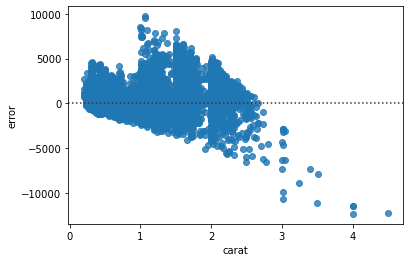

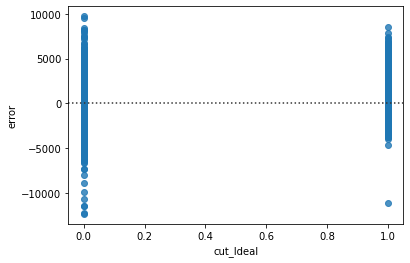

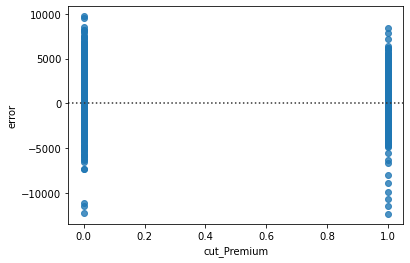

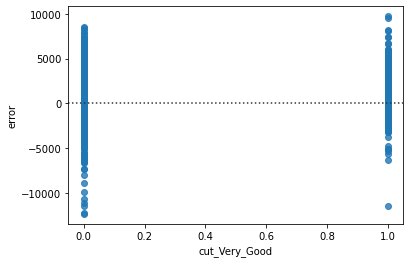

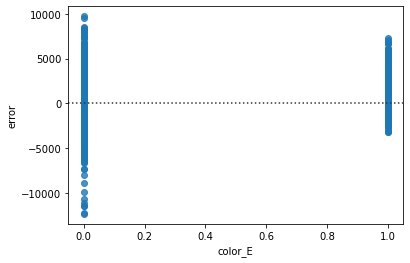

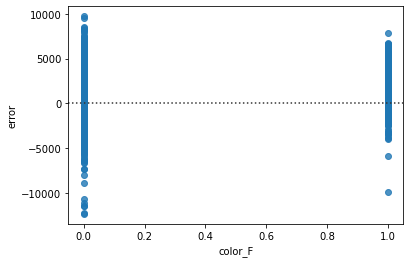

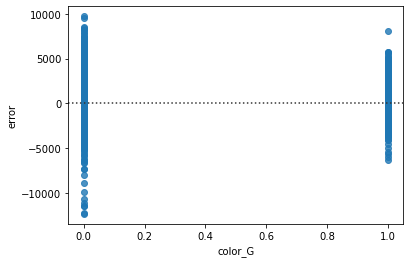

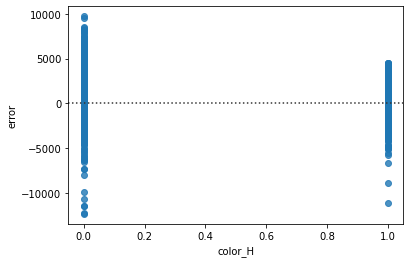

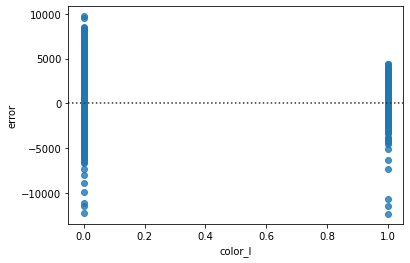

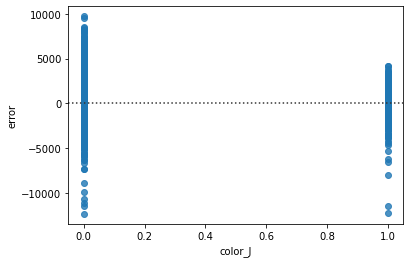

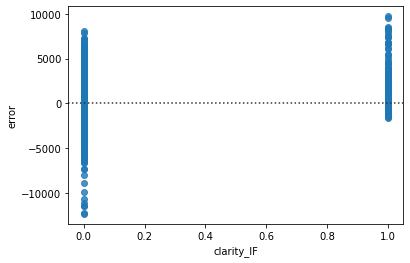

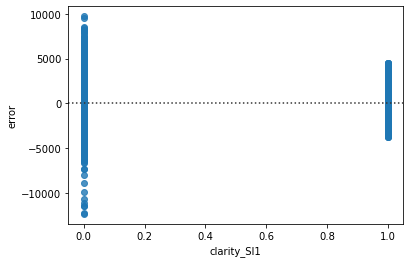

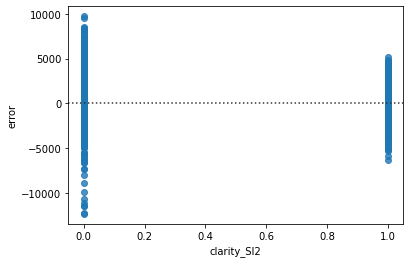

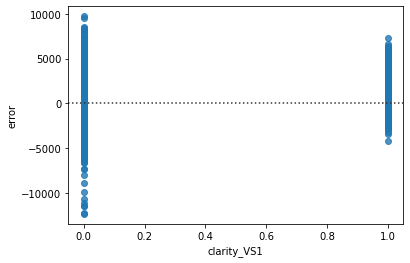

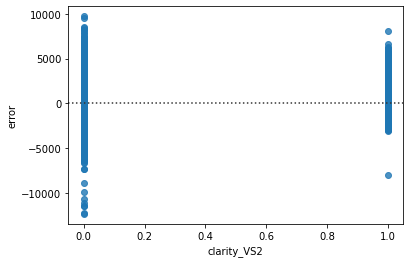

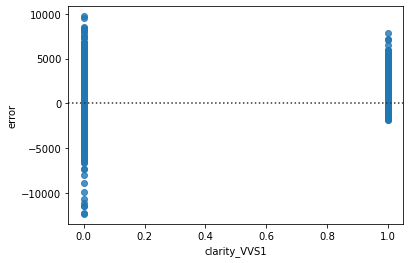

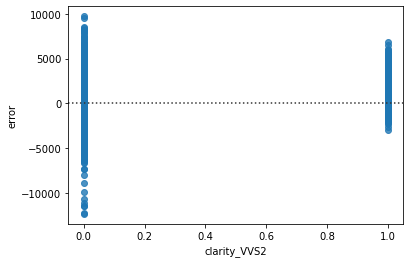

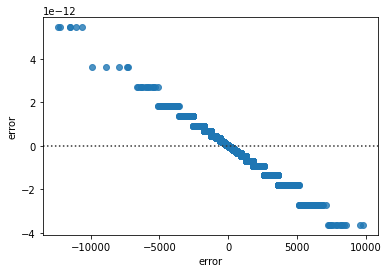

In [381]:
for names in range(0,len(X.columns)):
    sns.residplot(X.iloc[:,names],X['error'])
    plt.show()

In [382]:
X_train['error']=(y_train-train_y_pred)

<ipython-input-382-ad3a57b3240d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['error']=(y_train-train_y_pred)


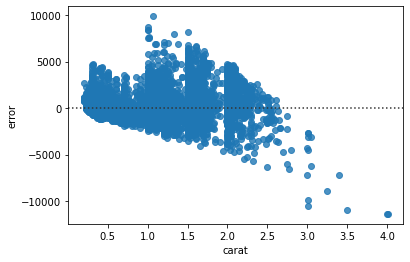

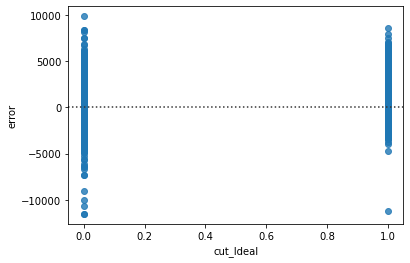

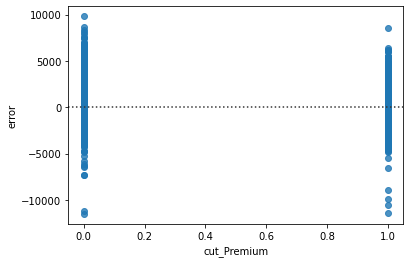

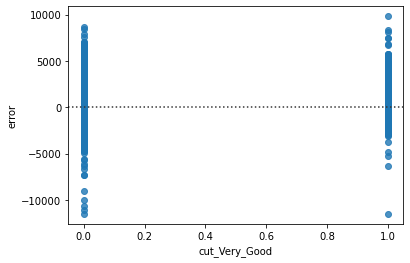

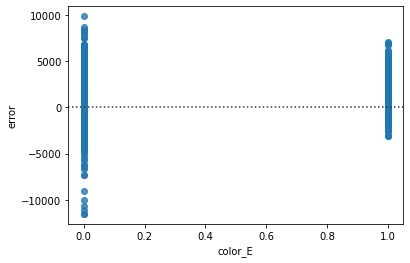

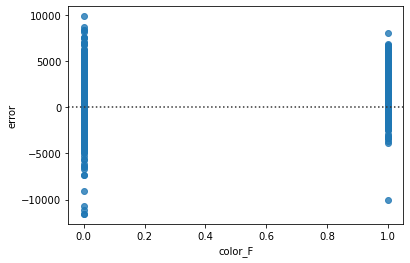

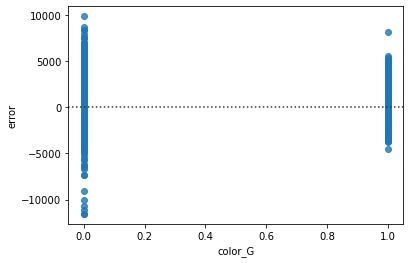

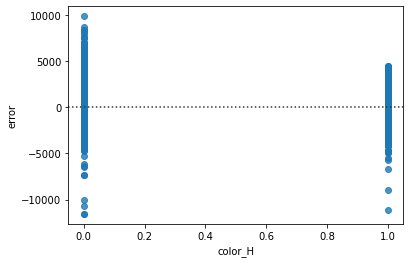

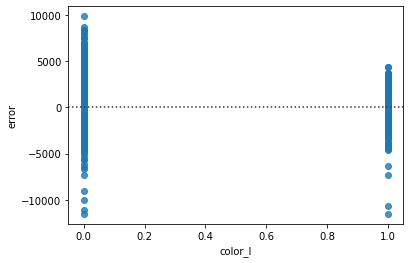

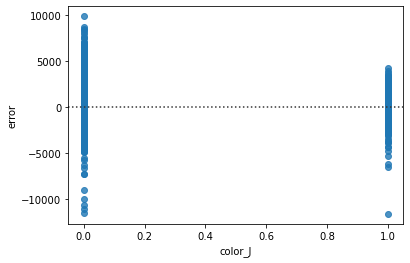

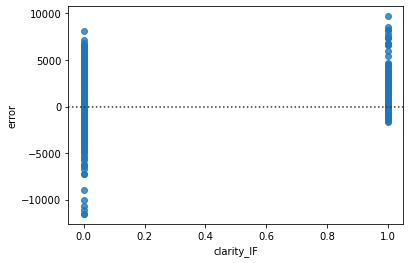

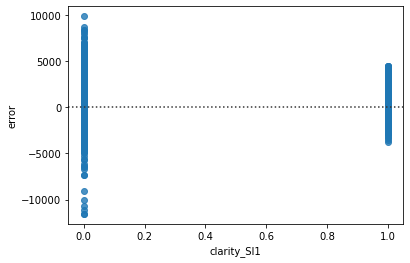

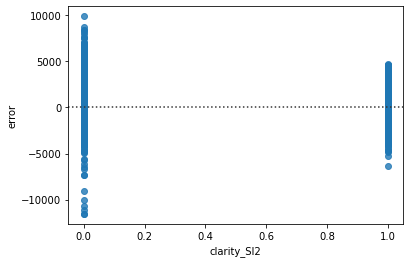

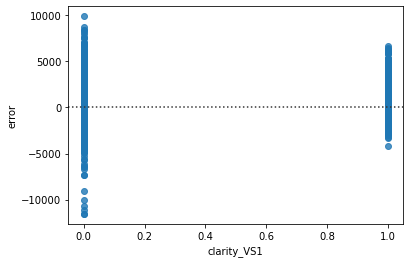

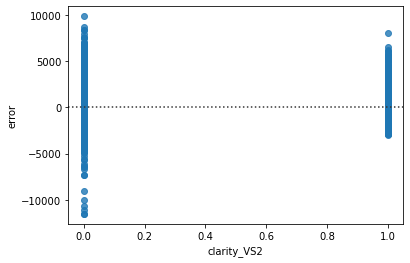

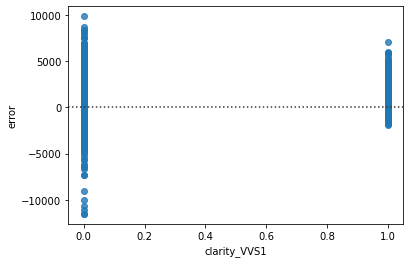

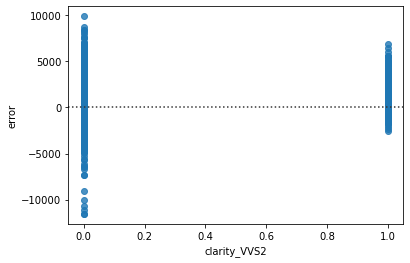

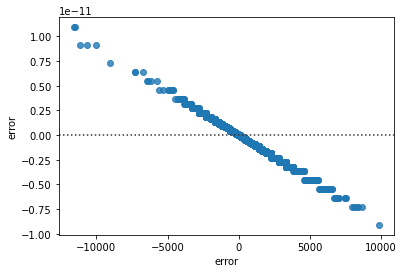

In [383]:
for names in range(0,len(X_train.columns)):
    sns.residplot(X_train.iloc[:,names],X_train['error'])
    plt.show()

In [384]:
X_test['error']=(y_test-test_y_pred)

<ipython-input-384-d81b5414d935>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['error']=(y_test-test_y_pred)


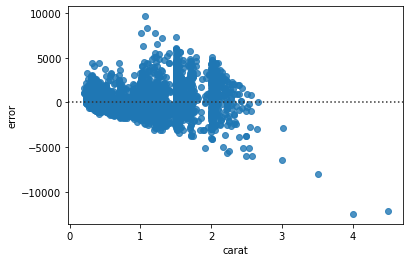

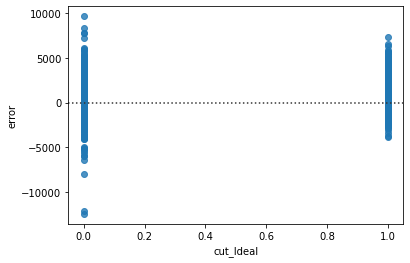

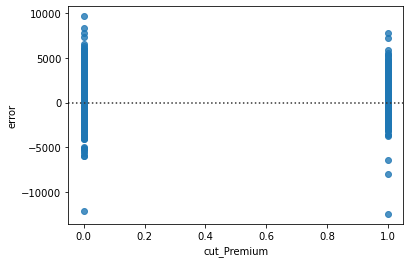

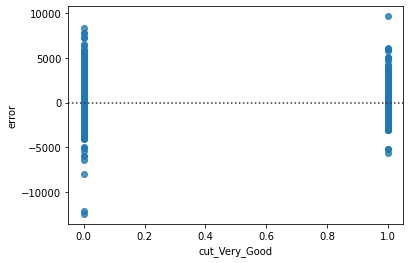

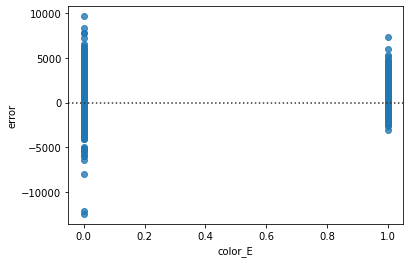

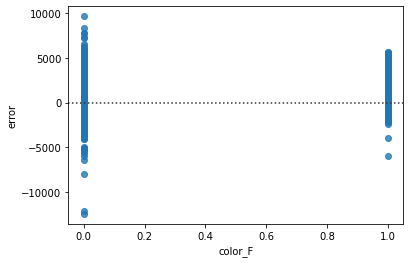

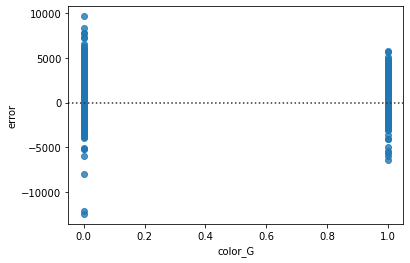

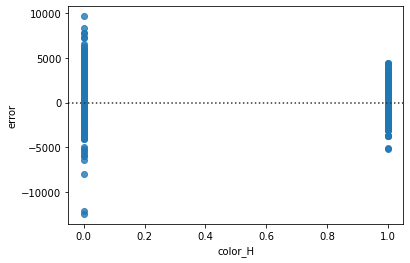

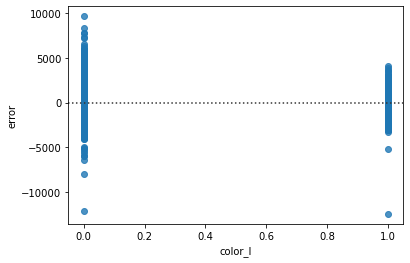

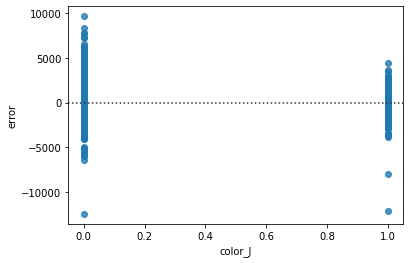

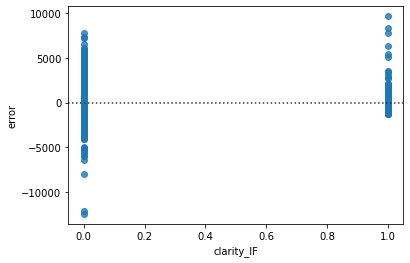

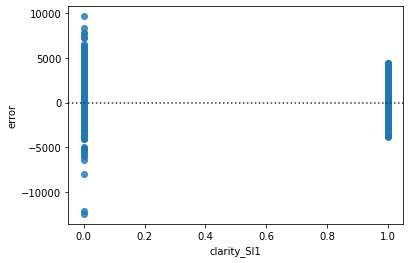

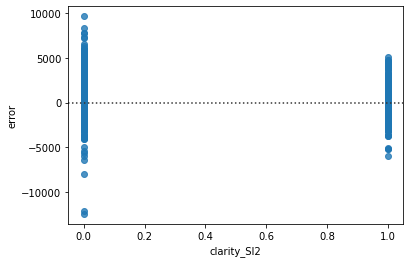

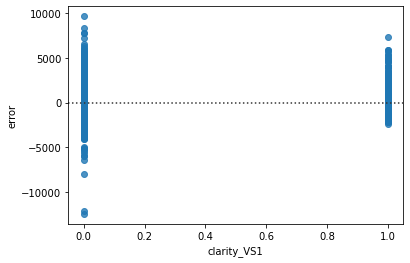

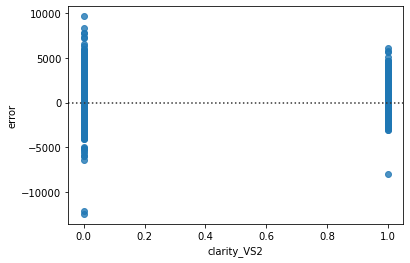

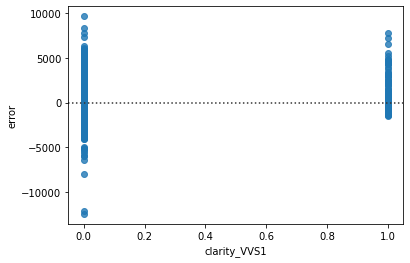

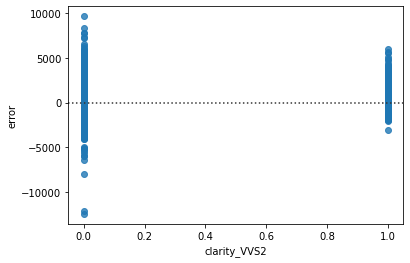

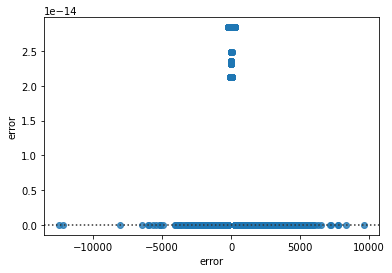

In [385]:
for names in range(0,len(X_test.columns)):
    sns.residplot(X_test.iloc[:,names],X_test['error'])
    plt.show()

**Here, we see that the Residual Plots does not necessarily follow any particular pattern.**

### Test of Assumption: There should not be any auto-correlation between the error terms. (One value of the error term should not predict the next value of the error term)

#### Durbin Watson test

In [386]:
import statsmodels

print('Result of Durbin Watson test on without split data',statsmodels.stats.stattools.durbin_watson(X['error'], axis=0))
print('Result of Durbin Watson test on Train data',statsmodels.stats.stattools.durbin_watson(X_train['error'], axis=0))
print('Result of Durbin Watson test on Test data',statsmodels.stats.stattools.durbin_watson(X_test['error'], axis=0))

Result of Durbin Watson test on without split data 2.003003099478269
Result of Durbin Watson test on Train data 1.9984487450001598
Result of Durbin Watson test on Test data 2.0257124063653027


**Here, we see that the Durbin-Watson test statistic is close to 2 and thus we can say there is no autocorrelation**

### Test of Assumption: The errors are assumed to be normally distributed

In [387]:
from scipy.stats import shapiro

print('Shapiro test result for total data without split data',shapiro(np.abs(X['error'])))
print('Shapiro test result for train data',shapiro(np.abs(X_train['error'])))
print('Shapiro test result for test data',shapiro(np.abs(X_test['error'])))

Shapiro test result for total data without split data ShapiroResult(statistic=0.7257522344589233, pvalue=0.0)
Shapiro test result for train data ShapiroResult(statistic=0.7345247864723206, pvalue=0.0)
Shapiro test result for test data ShapiroResult(statistic=0.7240467071533203, pvalue=0.0)


C:\Users\Swati\anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Since the p-value is less than 𝛼(0.05), we can say that the errors are not normally distributed and this particular assumption does not hold true.

In [388]:
res_nosplit = model_SLR.resid

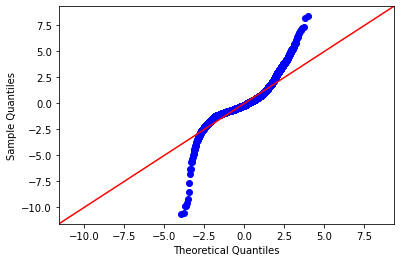

In [389]:
fig = sm.qqplot(res_nosplit,fit=True,line='45')
plt.show()

In [390]:
res = model.resid

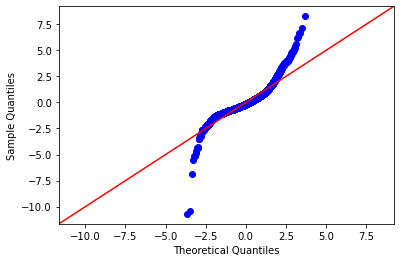

In [391]:
fig = sm.qqplot(res,fit=True,line='45')
plt.show()

In [392]:
result = sm.OLS(y, X).fit()
print(result.params)

carat            8425.976338
cut_Ideal          16.703568
cut_Premium      -111.215927
cut_Very_Good    -100.569709
color_E          -831.436647
color_F          -912.373501
color_G         -1064.392466
color_H         -1548.438197
color_I         -1966.175923
color_J         -2755.662204
clarity_IF       -253.638764
clarity_SI1     -2005.533995
clarity_SI2     -2867.837384
clarity_VS1     -1044.279681
clarity_VS2     -1354.189289
clarity_VVS1     -557.486261
clarity_VVS2     -655.263075
error               1.000000
dtype: float64
